In [ ]:
# import import_ipynb
# %run data_analysis_function.ipynb


# pd.datetime(df.column, unit ='ms')

In [ ]:
import numpy as np
a = np.zeros((156816, 36, 53806), dtype='uint8')

In [ ]:
# import data_analysis_function
a=None

In [ ]:
# from ipynb.fs.full.data_analysis_function import create_dataframe
# from ipynb.fs.full.data_analysis_function import conversion_timestamp_to_unixtime

In [ ]:
# from ipynb.fs.full.data_analysis_function import remove_rw_column

In [2]:
import json
#import collections
import os
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn import linear_model
from sklearn import tree

from dataset_analysis import create_dataframe, create_dateTime, create_month
from dataset_analysis import specific_month_df, drop_month_year, alter_time, rearrange_frame
from dataset_analysis import check_A_B_blast_furnace_1, no_zero_value_in_target_1, dataframe_reset_index
from dataset_analysis import drop_nan_value, drop_unique_valued_columns, drop_string_column, dataframe_datetime

from dataset_analysis import feature_selection_with_selectKbest
from dataset_analysis import pearson_correlation
from dataset_analysis import make_dataframe_with_high_correlated_value
# from dataset_analysis import dataframe_date_time_type
from dataset_analysis import draw_graph
# from dataset_analysis import draw_feature_vs_target

In [4]:
from model_file import make_dataset, scikit_learn_model
from model_file import plot_graph, evaluation_metrices
from model_file import NN_model
from model_file import make_dataset_LSTM, split_sequence, LSTM_model

In [5]:
with open('variable_config.json', 'r') as f:
    config = json.load(f)

filepath = config['DEFAULT']['file_path']
filepath_ubuntu = config['DEFAULT']['file_path_ubuntu']
filepath_ubuntu_1 = config['DEFAULT']['file_path_ubuntu_1']
feb_march_file = config['DEFAULT']['feb_march_file']

filepath_server_feb_march = config['DEFAULT']['file_path_server_feb_march']
filepath_server_april_may = config['DEFAULT']['file_path_server_april_may']
filepath_server_june_july = config['DEFAULT']['file_path_server_june_july']


start_pos = config['DEFAULT']['start_point_dataframe']
end_pos = config['DEFAULT']['end_point_dataframe']
date_column = config['DEFAULT']['date_column']
target_column = config['DEFAULT']['target_column']
req_drop_value_target = config['DEFAULT']['req_drop_value_target']
furnace_signal_column_a = config['DEFAULT']['blast_furnace_signal_a']
furnace_signal_column_b = config['DEFAULT']['blast_furnace_signal_b']
value_A = config['DEFAULT']['req_value_of_blast_furnace_A']
value_B = config['DEFAULT']['req_value_of_blast_furnace_B']
max_best_number = config['DEFAULT']['max_best_number']
correlation_threshold_min_value = config['DEFAULT']['correlation_threshold_min_value']
correlation_threshold_max_value = config['DEFAULT']['correlation_threshold_max_value']
required_number_of_test_data = config['DEFAULT']['required_number_of_test_data']
subfolder_feature_vs_target = config['DEFAULT']['subfolder_feature_vs_target']
evaluation_metrics_file_name = config['DEFAULT']['evaluation_metrics_file']
number_of_step_lstm = config['DEFAULT']['n_steps_lstm']
epochs = config['DEFAULT']['epochs']
batch_size = config['DEFAULT']['batch_size']


print(filepath_ubuntu)

/home/atif/20_aug_1.csv


In [6]:
current_directory = os.getcwd()
print('current_directory is: ',current_directory)
address = 'image_folder'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('created : ', final_directory)
else:
    print(' has already created',final_directory)
    pass

current_directory is:  /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction
 has already created /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/image_folder


In [4]:
# # import pandas as pd
# # count = 0
# # for data in pd.read_csv(filepath_server,encoding = 'ISO-8859-1',chunksize  = 1000):
# #     count += 1                          # counting the number of chunks
# #     lastlen = len(data)                 # finding the length of last chunk
# # datalength = (count*1000 + lastlen - 1000) # length of total file

# import multiprocessing as mp
# print("Number of processors: ", mp.cpu_count())

In [7]:
initial_dataframe = create_dataframe(filepath_server_feb_march)

In [8]:
print(initial_dataframe.shape)

(45128, 4240)


In [9]:
initial_dataframe.head(2)

,Unnamed: 0,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOUT10V1,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0
0,140972,1554076740000,68.800616,38.813747,92.134679,31.640239,55.709343,89.382264,93.755293,25.978776,...,0,83.568835,41.687065,37.582423,79.148815,75.633611,68.747738,66.438534,0.678688,12.421052
1,140973,1554076680000,71.799463,46.388546,91.813585,30.635985,55.709343,89.382264,93.714470,28.573610,...,0,83.620740,41.687065,37.524301,79.092552,75.611684,68.382080,66.390368,0.679430,11.903316


In [ ]:
# temp_frame = initial_dataframe.iloc[-45128:,:]
# temp_frame = initial_dataframe.iloc[-85349:-45128,:]
# temp_frame = initial_dataframe.iloc[-165519:-85349,:]

In [ ]:
# temp_frame.to_csv('june_july_1.csv')

In [ ]:
# read = create_dataframe('june_july_1.csv')

In [ ]:
# read.columns.get_loc('Unnamed: 0')

In [ ]:
# read_1 = read.drop(read.columns[0], axis=1)

In [ ]:
# read_1.tail(2)

In [10]:
df_1 = create_dateTime(initial_dataframe,'row_ID','Unnamed: 0')
# df_1 = create_dateTime(read_1)

In [ ]:
# def distinct_month_1(dataframe, target_column,month_key):
#     array_df = []
#     for i in month_key:
#         req_data_1=dataframe.loc[(dataframe[target_column]==i)]
#         req_frame_1=pd.DataFrame(req_data_1,columns=dataframe.columns)
        
#         array_df.append(req_frame_1)
    
#     return array_df

In [ ]:
# def draw_month(month_key_value, dict_of_month,target_column):
#     for i in month_key_value:
#         value = dict_of_month[i]
#         value.iloc[:].plot(y=[target_column])
#         plt.title('visualization of signal ' + str(target_column) + ' in time of ' + str(i))
#         plt.xlabel('range')
#         plt.ylabel('value')

#         plt.rcParams['figure.figsize'] = (5,5)
#         plt.savefig(str(i) + '.jpg')
#         plt.show()

In [13]:
date_df, month_array_df = create_month(df_1, 'month', target_column)

In [31]:
# # for i in specific_month_df['month']:
# #     print(i)

# initial_dataframe = None
# df_1 = None
# date_df = None
# specific_month_df = None
# spec_month = None
# multivariate_data = None
# rearranged_dataframe = None
# dataframe_x = None
# dataframe_y = None
# dataframe_no_zero_value_blast_furnace = None

In [14]:
# import pandas as pd
# def specific_month_df(dataframe,target_column_month):
#     req_data_month=dataframe.loc[(dataframe[target_column_month]==2) | (dataframe[target_column_month]==3) |
#                                  (dataframe[target_column_month]==4)
#                                  | (dataframe[target_column_month]==5) | (dataframe[target_column_month]==6) | (dataframe[target_column_month]==7)
#                                  | (dataframe[target_column_month]==8)]
# #     req_data_month=dataframe.loc[(dataframe[target_column_month]==2|3) ]
#     req_frame_month=pd.DataFrame(req_data_month,columns=dataframe.columns)
    
#     return req_frame_month

specific_month_df = specific_month_df(date_df,'month')

In [15]:
# def drop_month_year(dataframe):
# #     dataframe = dataframe.drop(['year','month'], axis=1)
#     dataframe = dataframe.reset_index()
#     return dataframe

# spec_month = drop_month_year(date_df)
spec_month = drop_month_year(specific_month_df)

In [ ]:
# spec_month = spec_month.iloc[:200,:]

In [ ]:
# df_2.columns.get_loc(target_column)
# print(df_2.columns[4142])
# target_df = df_2.loc[:, df_2.columns[4142]]

In [ ]:
# targ = pd.DataFrame(target_df)

In [ ]:
# df_month = pd.DataFrame(index=df_2.index)

In [ ]:
# df_month['year'] = pd.DatetimeIndex(df_month.index).year

In [ ]:
# df_month['month'] = pd.DatetimeIndex(df_month.index).month

In [ ]:
# df_month

In [ ]:
# df_month_final = pd.concat([df_month, target_df], axis=1)
# df_month_final.head()

In [ ]:
# u = initial_dataframe.columns.get_loc("DEWIHOAT9_I0")
# v = initial_dataframe.columns.get_loc("DEWIHOBT9_I0")
# w = initial_dataframe.columns.get_loc("DEWIHOAT8_I0")
# x = initial_dataframe.columns.get_loc("DEWIHOBT8_I0")
# print(u,v,w,x)

# plotted blast furnace A and B for Turbine 8's output

In [ ]:
# print(initial_dataframe.shape)
# plt.plot(initial_dataframe["AEWIHO_T8AV2"], color = 'blue')
# plt.plot(initial_dataframe["DEWIHOBT8_I0"], color = 'red')
# plt.plot(initial_dataframe["DEWIHOAT8_I0"], color = 'black')
# plt.legend(["AEWIHO_T8AV2", "DEWIHOBT8_I0","DEWIHOAT8_I0"], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (20, 10)

# plotted blast furnace A and B for Turbine 9's output

(45128, 4240)


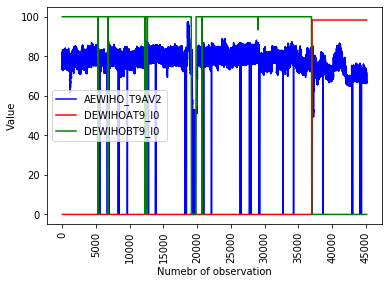

In [16]:
print(initial_dataframe.shape)
plt.plot(initial_dataframe[target_column], color = 'blue')
plt.plot(initial_dataframe[furnace_signal_column_a], color = 'red')
plt.plot(initial_dataframe[furnace_signal_column_b], color = 'green')
plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='best')
# plt.xlim(0,initial_dataframe.shape[0]+10)
plt.xticks(np.arange(0,initial_dataframe.shape[0],5000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
plt.savefig('blast_vs_target_pre.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] = (12,5)

In [17]:
multivariate_data = alter_time(spec_month, start_pos,spec_month.shape[0])

In [18]:
index_array=[0,-1]
req_column_name = [date_column, target_column]
# req_column_name = [date_column, furnace_signal_column]
rearranged_dataframe = rearrange_frame(multivariate_data,req_column_name,index_array)

In [19]:
dataframe_no_zero_value_blast_furnace = check_A_B_blast_furnace_1(rearranged_dataframe, furnace_signal_column_a, value_A,
                                                               furnace_signal_column_b, value_B)

In [26]:
# dataframe_x = dataframe_no_zero_value_blast_furnace.reset_index()
# dataframe_y = dataframe_x.drop(['index'], axis=1)

(141456, 4241)


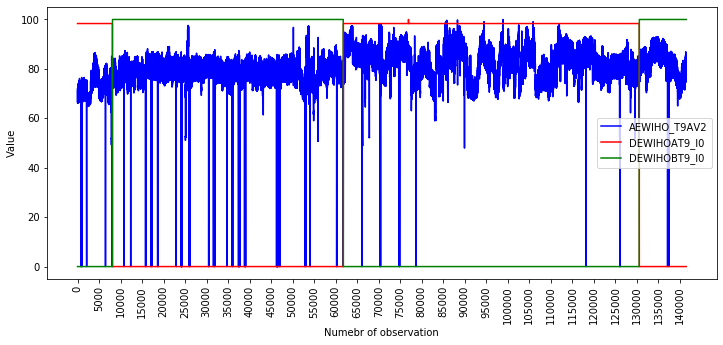

In [27]:
# print(dataframe_y.shape)
# plt.plot(dataframe_y[target_column], color = 'blue')
# plt.plot(dataframe_y[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_y[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='best')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,dataframe_y.shape[0],5000),rotation='vertical')
# plt.xlabel('Numebr of observation')
# plt.ylabel('Value')
# plt.savefig('blast_vs_target_vanish_furnace_zero.png',bbox_inches='tight')
# plt.rcParams['figure.figsize'] = (12,5)

In [ ]:
# no_zero_furnace_1 = check_A_B_blast_furnace(rearranged_dataframe, furnace_signal_column_a, value_A,
#                                                                furnace_signal_column_b, value_B)

In [ ]:
# no_zero_furnace_1.dtypes

In [ ]:
# print(no_zero_furnace.shape)
# print(type(no_zero_furnace))

# print(no_zero_furnace_1.shape)
# print(type(no_zero_furnace_1))


# rearranged_dataframe.head()

In [ ]:
# new_frame = pd.concat([first_col, sec_col], axis=1)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == '<M8[ns]' or rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)
    

In [ ]:
# increase_1=0
# count_array_2 = []
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
    
#     if v < 98 and rearranged_dataframe.iloc[i][furnace_signal_column_b] <100:
        
# #         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
#         count_array_2 = np.append(count_array_2, i)
#         increase_1+=1

In [20]:
dataframe_no_zero_value_target_column = no_zero_value_in_target_1(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [18]:
# plt.plot(dataframe_no_zero_value_blast_furnace[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_b], color = 'green')
# # plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (10, 5)

# dataframe_no_zero_value_target_column = None

In [21]:
dataframe_no_zero_value_target_column_2 = dataframe_reset_index(dataframe_no_zero_value_target_column)
print(dataframe_no_zero_value_target_column_2.shape)

(43982, 4241)


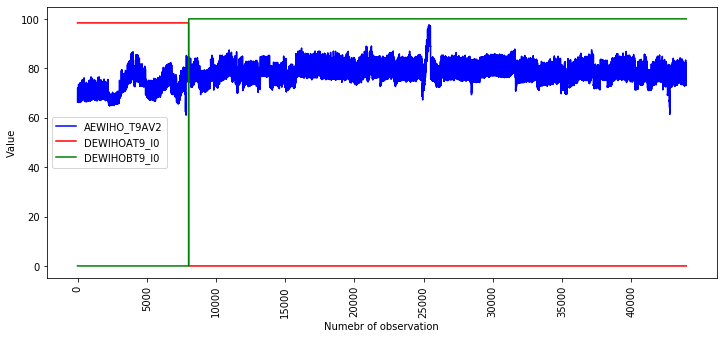

In [22]:
plt.plot(dataframe_no_zero_value_target_column_2[target_column], color = 'blue')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_b], color = 'green')
plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='center left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
plt.xticks(np.arange(0,dataframe_no_zero_value_target_column_2.shape[0],5000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
plt.savefig('blast_vs_target_post.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] = (12, 5)

In [ ]:
# dataframe_no_zero_value_target_column = no_zero_value_in_target(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [ ]:
# qq = dataframe_no_zero_value_target_column.apply(pd.to_numeric)

In [ ]:
# qq['dateTime'].dtypes

In [ ]:
# drop_object = dataframe_no_zero_value_target_column.select_dtypes(exclude=['object'])

In [ ]:
# Drop the column which has sam evalue in every ROW
# dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [23]:
# Drop the ROW which has NAN value
multivariate_data_drop_nan = drop_nan_value(dataframe_no_zero_value_target_column_2)

In [ ]:
# nunique = multivariate_data_drop_nan.apply(pd.Series.nunique)
# cols_to_drop = nunique[nunique == 1].index
# dataframe_drop_column_with_same_value = multivariate_data_drop_nan.drop(cols_to_drop, axis=1)

In [24]:
dataframe_drop_column_with_same_value = drop_unique_valued_columns(multivariate_data_drop_nan)

In [ ]:
# dataframe_drop_column_with_same_value = drop_column_with_same_value(multivariate_data_drop_nan)

In [ ]:
# Drop the row who has consecutive same value
# dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

In [ ]:
# dataframe_drop_row_consecutive_same_value= multivariate_data_drop_nan

In [25]:
# Drop the column who has 'objet' type value
dataframe_no_string = drop_string_column(dataframe_drop_column_with_same_value)

In [26]:
dataframe_no_string.dtypes

dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
RWWIHOTSUMV0           float64
RWWIHO_VERV0           float64
RWWIHO_UESV0           float64
RWWIHOSUMAV0           float64
AEWIHO_T9AV2           float64
Length: 2923, dtype: object

In [27]:
initial_dataframe = None
date_df = None
specific_month_df = None
spec_month = None
rearranged_dataframe = None
multivariate_data = None
dataframe_no_zero_value_blast_furnace = None
dataframe_no_zero_value_target_column = None
multivariate_data_drop_nan = None
dataframe_drop_column_with_same_value = None

In [26]:
# dataframe_drop_row_consecutive_same_value = drop_row(dataframe_no_string)

(43982, 2923)


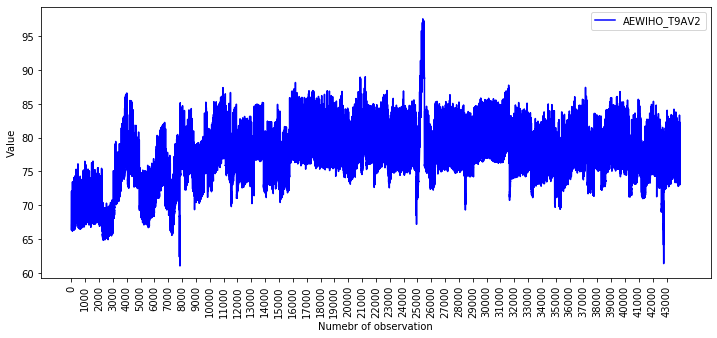

In [28]:
print(dataframe_no_string.shape)

plt.plot(dataframe_no_string[target_column], color = 'blue')
# plt.plot(dataframe_no_string[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_string[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
plt.legend([target_column], loc='best')
plt.xticks(np.arange(0,dataframe_no_string.shape[0],1000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
plt.savefig('final_target_column.png',bbox_inches='tight')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (12, 5)

# drop column who has always same value

In [ ]:
# new_frame = multivariate_data_drop_nan.drop(multivariate_data_drop_nan.std()[(multivariate_data_drop_nan.std() == 0)].index, axis=1)

In [ ]:
# cols = multivariate_data_drop_nan.select_dtypes([np.number]).columns
# diff = multivariate_data_drop_nan[cols].diff().sum()
# no_same_value_column = multivariate_data_drop_nan.drop(diff[diff == 0].index, axis=1)

In [ ]:
# print(dataframe_drop_column_with_same_value.shape)
# print(multivariate_data_drop_nan.shape)
# print(dataframe_drop_row_consecutive_same_value.shape)
# print(dataframe_no_string.shape)
# print(new_frame.shape)

In [29]:
# Make dataframe with dateTime index
dataframe_datetime = dataframe_datetime(dataframe_no_string)

In [30]:
dataframe_datetime.shape

(43982, 2922)

In [31]:
# Feature selection with Sklearn feature best technique
sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)

In [32]:
# feature selection with Pearson Correlation.
sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)

In [ ]:
# correlation_csv = main_correlation.to_csv('high_correlation_feb_march_april_may.csv')

In [ ]:
# dataframe_datetime.to_csv('dataframe_datetime_feb_march_april_may.csv')

In [33]:
# make a dataframe with signal who is lies between a given range of correlation threshold value
main_frame = dataframe_datetime
correlated_frame = main_correlation

# main_frame = sklearn_feature_best_dataframe
# correlated_frame = sklearn_correlation

dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)

In [34]:
print(dataframe_high_correlation.shape)
dataframe_high_correlation.describe()

(43982, 4)


,RWWIHOBG9_V0,AEWIGHG9__P0,AEWIGHG9__T0,AEWIHO_T9AV2
count,43982.000000,43982.000000,43982.000000,43982.000000
mean,64.260755,82.044461,77.888892,75.408309
std,30.286731,8.561464,5.660269,4.142153
min,0.000000,9.853600,37.072978,61.020431
25%,74.612018,78.339536,75.197192,73.414111
50%,77.344752,84.047312,78.973621,75.582311
75%,78.843572,88.140525,81.832457,77.020827
max,100.000000,100.000000,91.486047,97.591043


In [35]:
dataframe_high_correlation.head(2)

,RWWIHOBG9_V0,AEWIGHG9__P0,AEWIGHG9__T0,AEWIHO_T9AV2
dateTime,,,,
2019-02-11 20:57:00,3.165909e-19,64.401098,63.413868,66.387058
2019-02-11 20:58:00,3.165909e-19,63.977060,63.408894,66.765225


In [36]:
dataframe_resample = dataframe_high_correlation.resample('1min').mean()

(69303, 4)


/home/atif/iai_ml_venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  # Remove the CWD from sys.path while we load stuff.


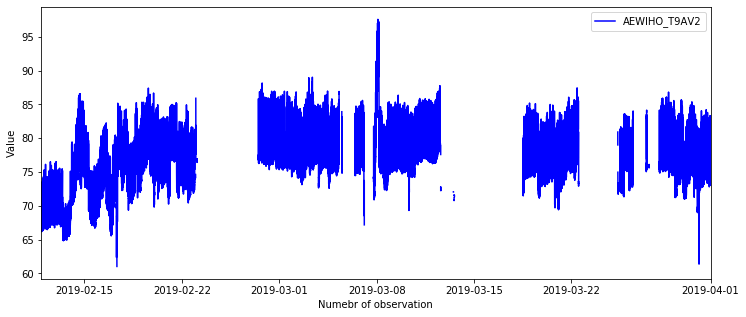

In [38]:
print(dataframe_resample.shape)

plt.plot(dataframe_resample[target_column], color = 'blue')
plt.legend([target_column], loc='best')
# plt.xticks(np.arange(dataframe_resample.index[0],dataframe_resample.index[-1]),rotation='vertical')
# plt.xticks(rotation = 'vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('final_target_column.png',bbox_inches='tight')
plt.xlim(dataframe_resample.index[0],dataframe_resample.index[-1]+5)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (12, 5)

In [39]:
dataframe_interpolate = dataframe_resample.interpolate('linear')

(69303, 4)


/home/atif/iai_ml_venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  if __name__ == '__main__':


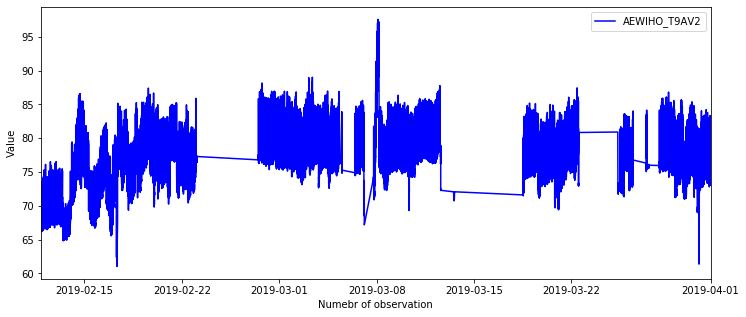

In [40]:
print(dataframe_interpolate.shape)
plt.plot(dataframe_interpolate[target_column], color = 'blue')
plt.legend([target_column], loc='best')
# plt.xticks(np.arange(dataframe_resample.index[0],dataframe_resample.index[-1]),rotation='vertical')
# plt.xticks(rotation = 'vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('final_target_column.png',bbox_inches='tight')
plt.xlim(dataframe_interpolate.index[0],dataframe_interpolate.index[-1]+5)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (12, 5)

In [ ]:
# multivariate_column_label = ['AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.94


In [ ]:
# for i in dataframe_high_correlation:
#     plt.plot(dataframe_high_correlation[i])
#     plt.title(str(i))
#     plt.show()
    
    
#     # plt.plot(dataframe_high_correlation['AEWIHOBKF_V0'])

In [ ]:
# dataframe_high_correlation_1 = dataframe_high_correlation.drop(['AEWIHOBKF_V0'], axis=1)
# print(dataframe_high_correlation_1.shape)
# plt.plot(dataframe_datetime['DEDAHGGHSZG1'], color = 'blue')

In [ ]:
# current_directory = os.getcwd()
# print('current_directory is: ',current_directory)
# address = 'image_folder'
# final_directory = current_directory+'/'+str(address)
# if not os.path.exists(final_directory):
#     os.makedirs(final_directory)
#     print('created : ', final_directory)
# else:
#     print(' has already created',final_directory)
#     pass

In [41]:
from datetime import date
today = date.today()
print("Today's date:", today)

Today's date: 2019-10-06


In [48]:
dataframe_high_correlation.shape

(43982, 4)

4


/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 3.1659094981320927e-19 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


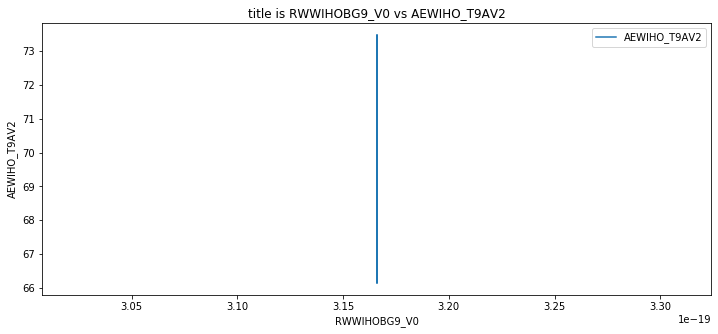

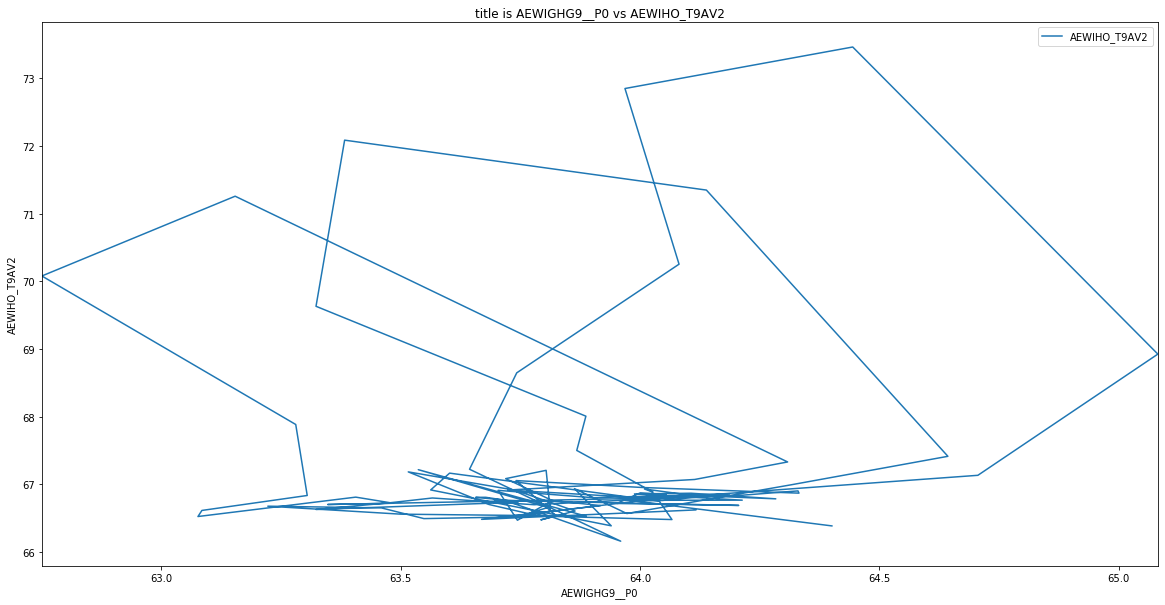

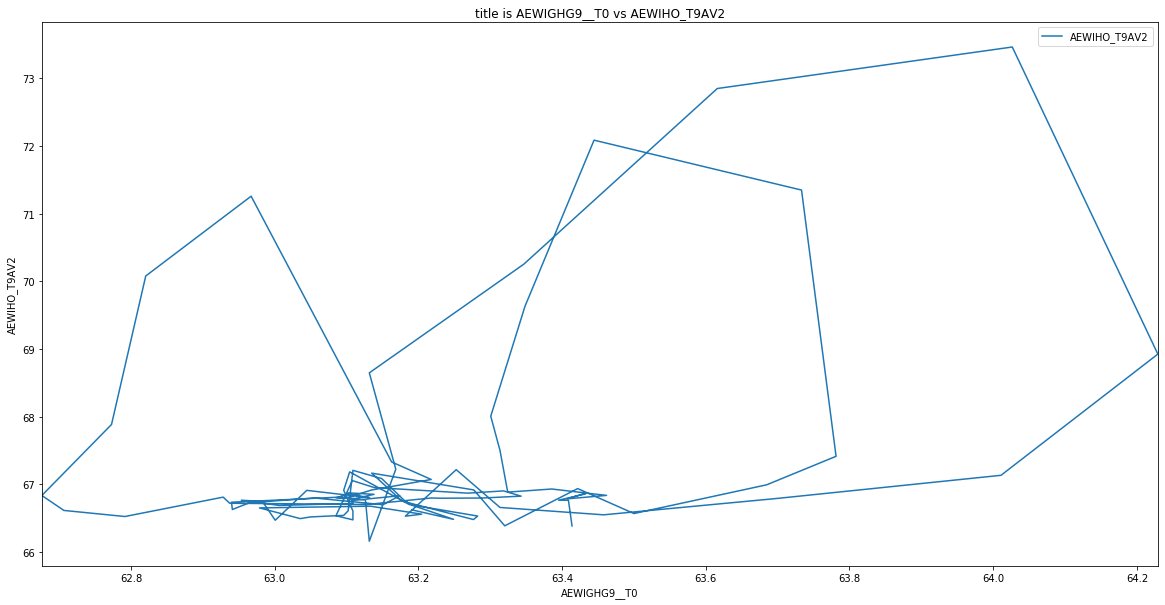

In [42]:
from dataset_analysis import draw_feature_vs_target
print(len(dataframe_high_correlation.columns))
subfolder_1 = 'feature_vs_target'+'_'+str(today)
draw_feature_vs_target = draw_feature_vs_target(dataframe_interpolate,final_directory,subfolder_1)

In [47]:
def make_dataset(dataframe, required_number_of_test_data):
    dataset = np.array(dataframe)
    
    go_for_training = int(len(dataset)-required_number_of_test_data)
    print('go_for_training: ', go_for_training)
    print('required_number_of_test_data: ', required_number_of_test_data)
    percentage = go_for_training/int(len(dataset))
    print('percentage: ',percentage)
    
    NumberOfElements = int(len(dataset) * percentage)
    print('Number of Elements for training: ', NumberOfElements)
    print('dataset length: ', len(dataset))

    train_input = dataset[0:NumberOfElements, 0:-1]
    print('train_input shape: ', train_input.shape)
    train_output = dataset[0:NumberOfElements, -1]
    print('train_output shape: ', train_output.shape)

    test_input = dataset[NumberOfElements:len(dataset), 0:-1]
    test_output = dataset[NumberOfElements:len(dataset), -1]
    

#     test_input = test_input[500:560]
#     test_output = test_output[500:560]
    print('test_input shape: ', test_input.shape)
    print('test_output shape: ', test_output.shape)

    return train_input, train_output, test_input, test_output

In [48]:
train_input, train_output, test_input, test_output = make_dataset(dataframe_interpolate,required_number_of_test_data=1000)

#s_array = dataframe_high_correlation.values
model_list = [LinearRegression(),linear_model.Lasso(alpha=0.1),linear_model.Ridge(alpha=.5),
              linear_model.BayesianRidge(), tree.DecisionTreeRegressor(max_depth=2),ExtraTreesRegressor(),
              BaggingRegressor(ExtraTreesRegressor()),GBR()]
name = ['LinearRegression','Lasso','Ridge','BayesianRidge','tree','ExtraTreesRegressor','BaggingRegressor','GBR']

go_for_training:  68303
required_number_of_test_data:  1000
percentage:  0.9855706102188938
Number of Elements for training:  68303
dataset length:  69303
train_input shape:  (68303, 3)
train_output shape:  (68303,)
test_input shape:  (1000, 3)
test_output shape:  (1000,)


In [49]:
evaluation_metrics_file_path = final_directory+'/'+evaluation_metrics_file_name
if not os.path.isfile(evaluation_metrics_file_path):
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file now created')
else:
    os.remove(evaluation_metrics_file_path)
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file removed and created')

metrics file removed and created


------- LinearRegression


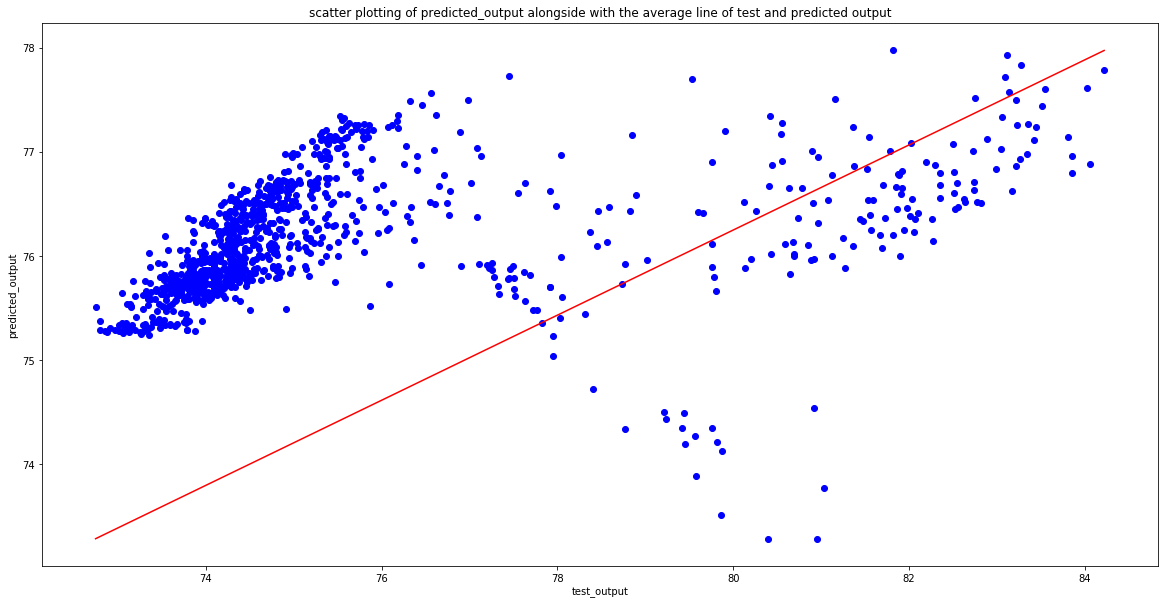

<class 'numpy.ndarray'>


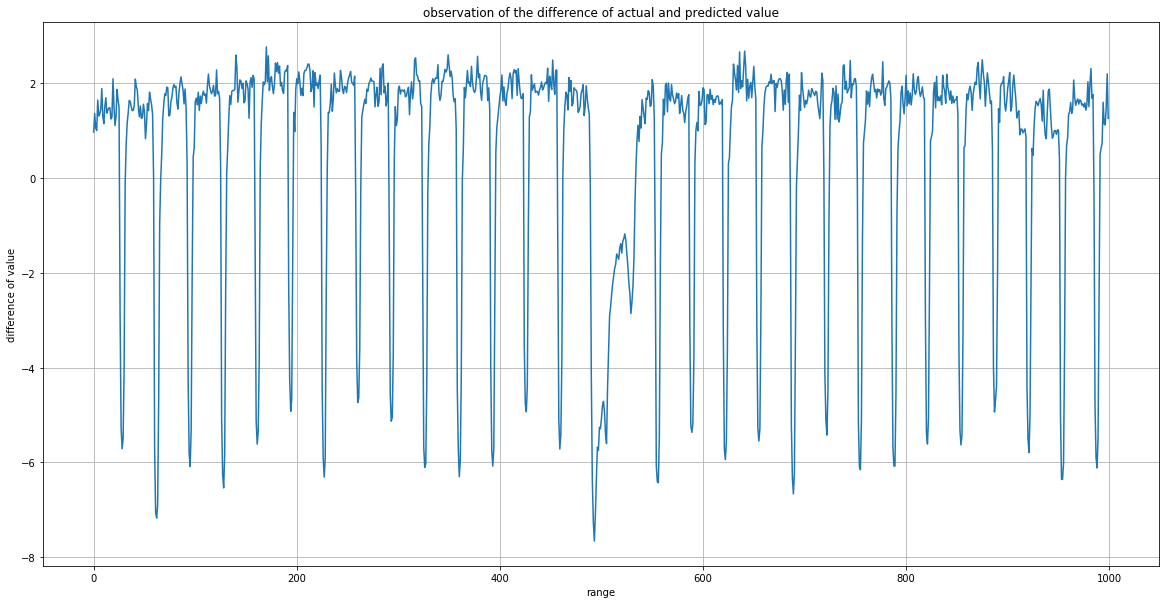

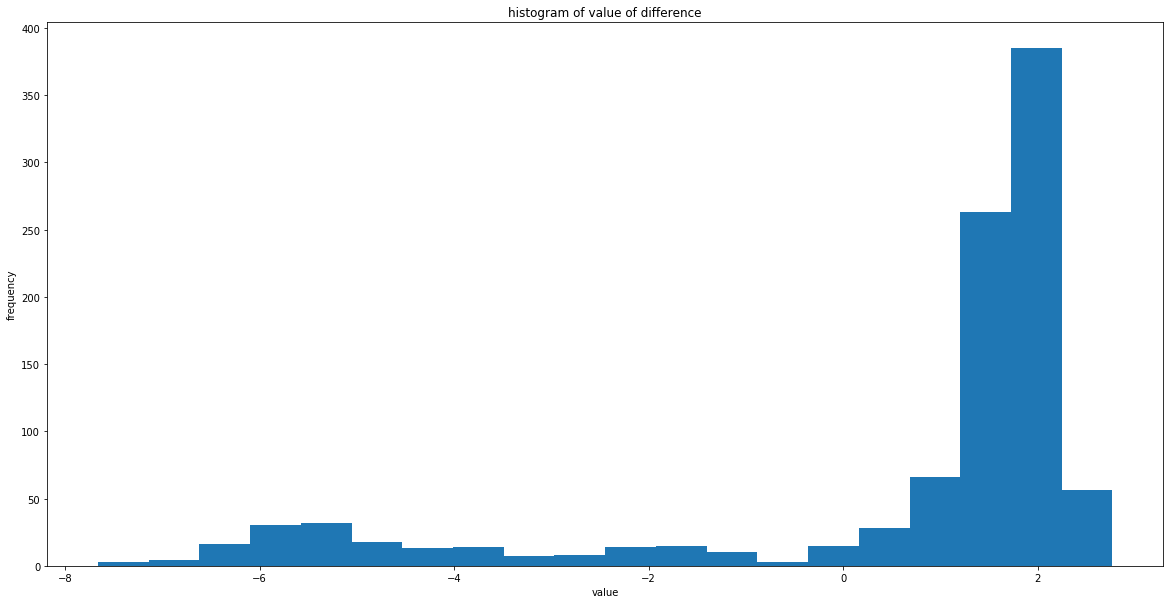

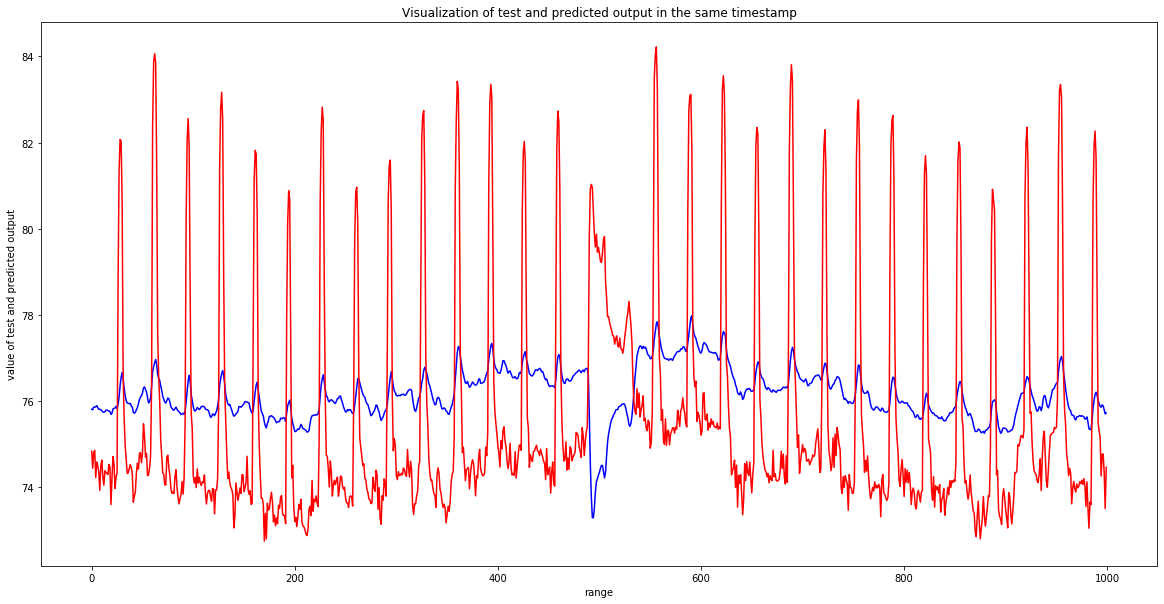

r_2 statistic: 0.07
Mean_absolute_error: 2.17
Mean squared error: 6.50
RMSE:  2.5486693487921346
!!!!---------------!!!!----------------!!!!
------- Lasso


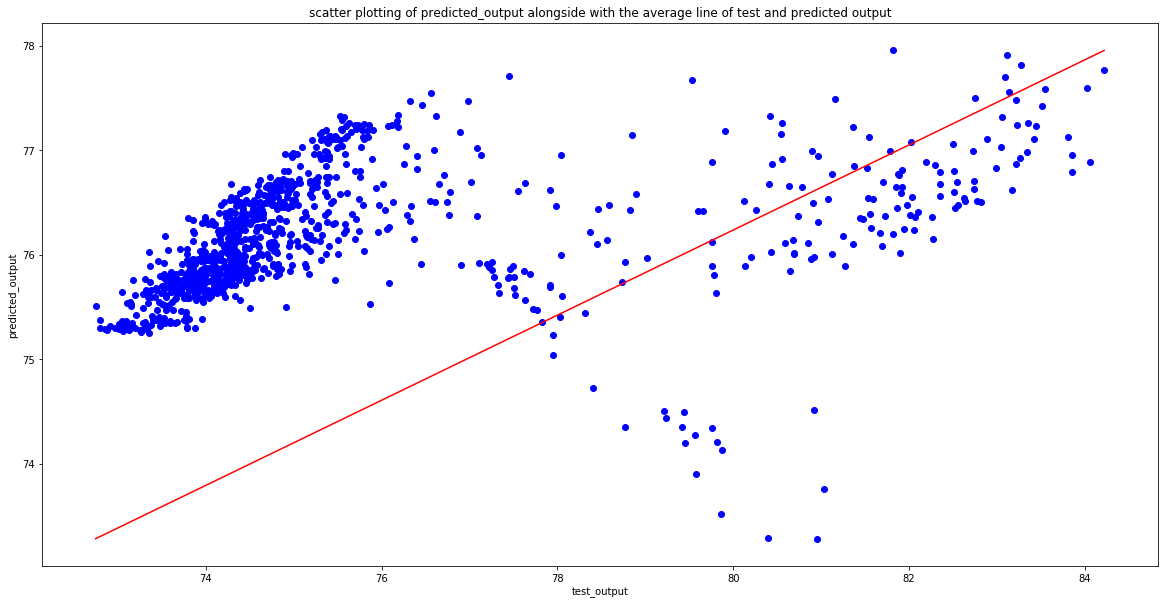

<class 'numpy.ndarray'>


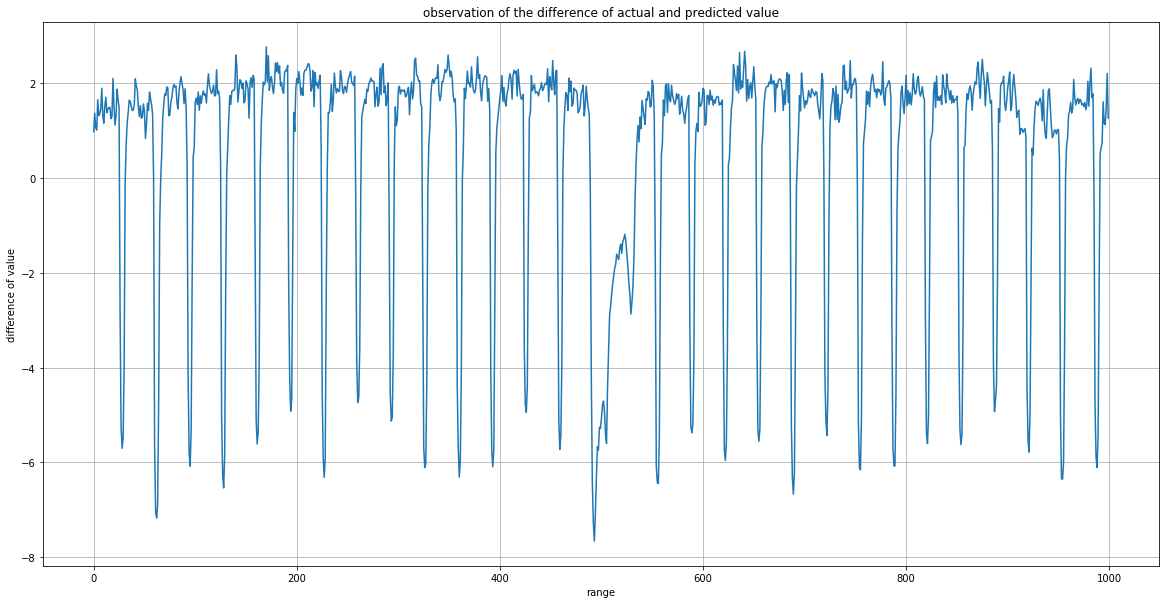

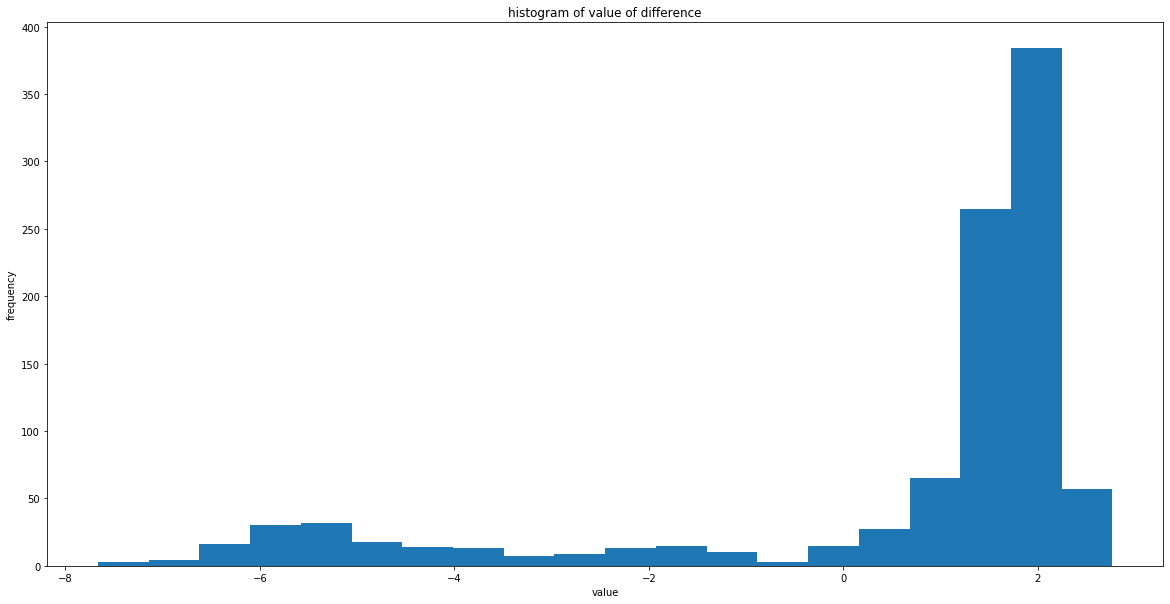

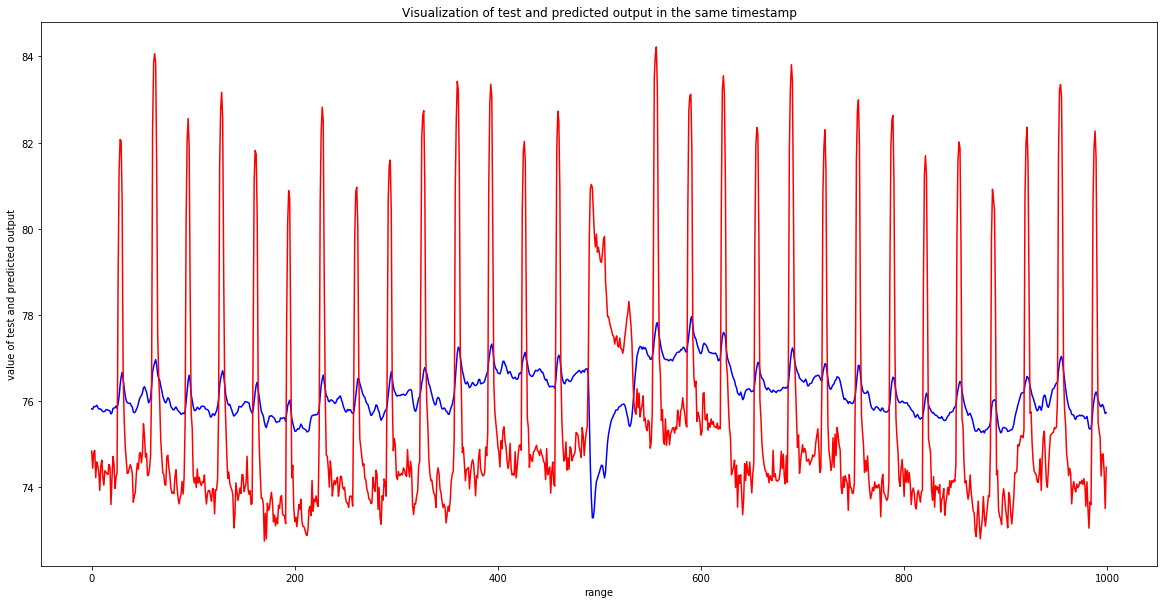

r_2 statistic: 0.07
Mean_absolute_error: 2.17
Mean squared error: 6.50
RMSE:  2.549385119270085
!!!!---------------!!!!----------------!!!!
------- Ridge


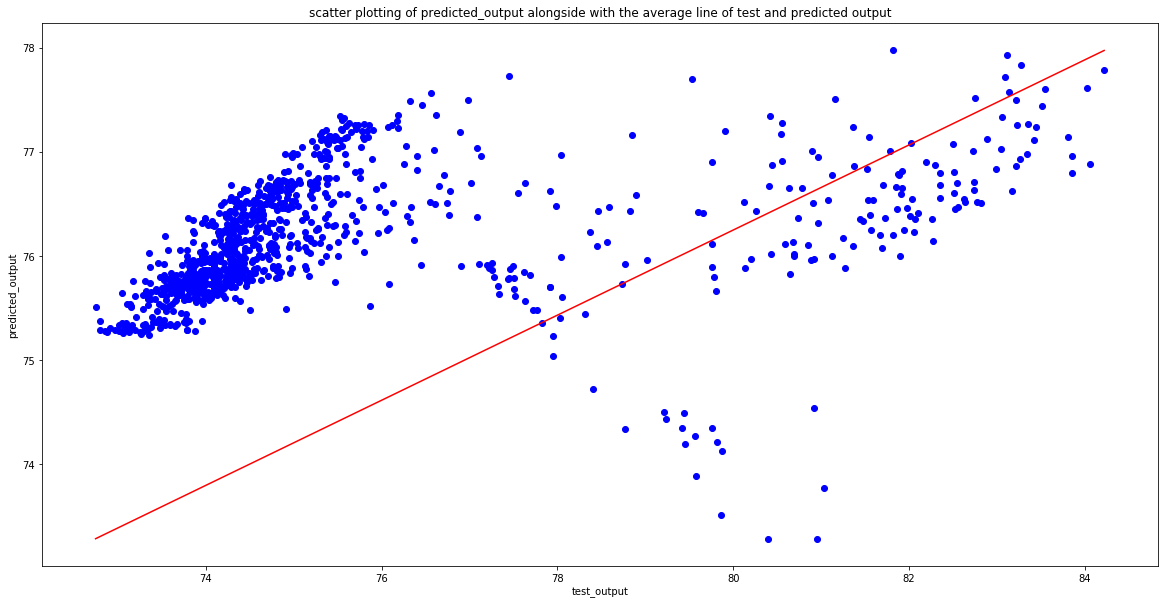

<class 'numpy.ndarray'>


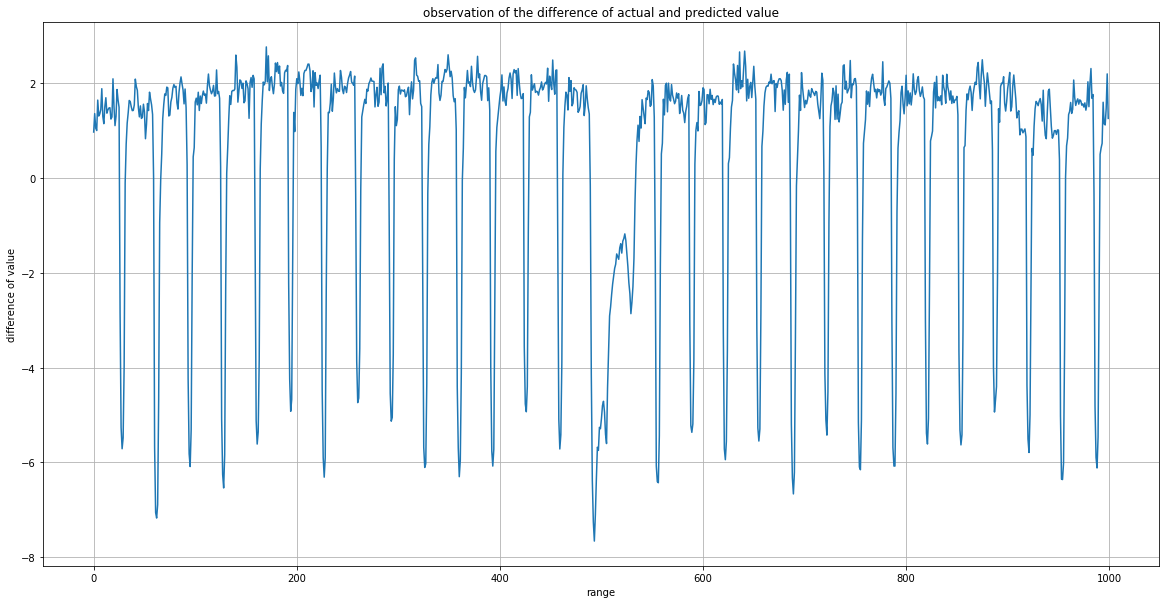

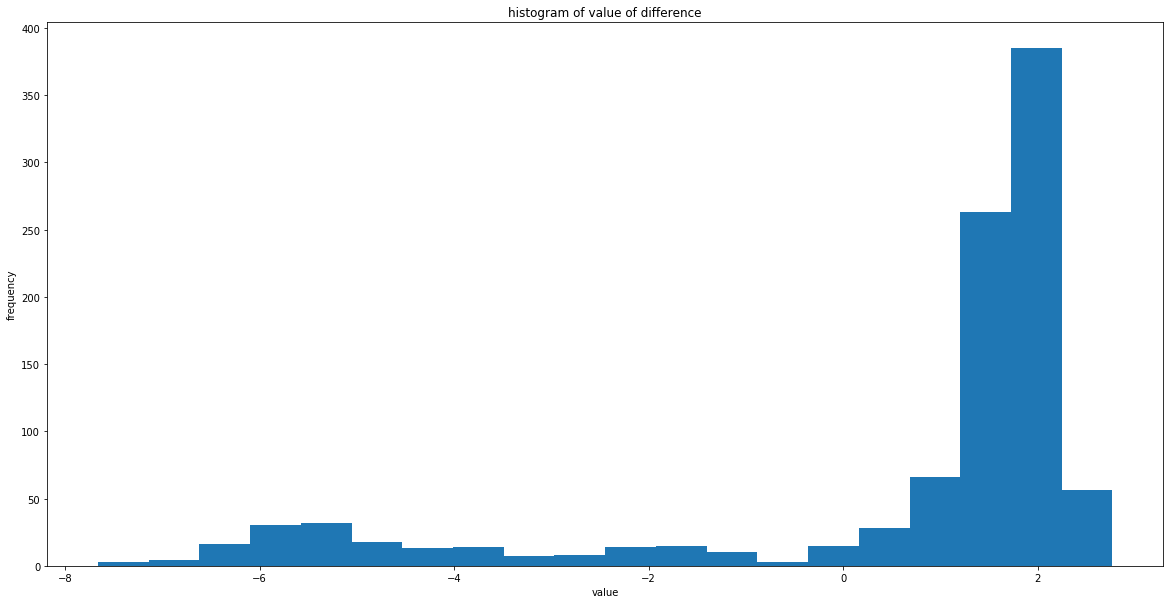

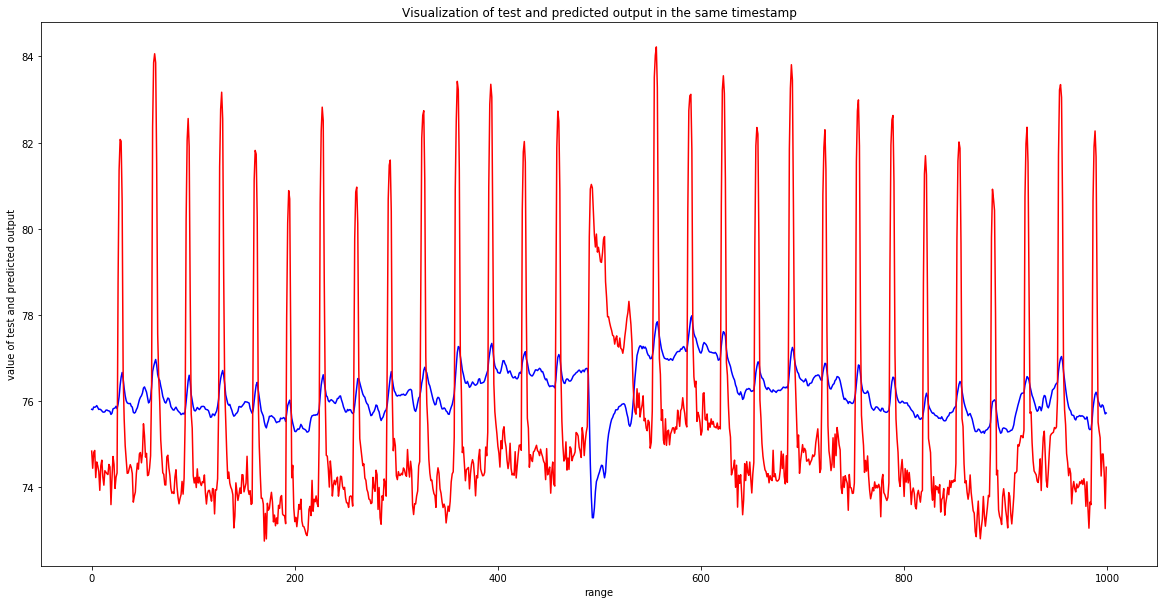

r_2 statistic: 0.07
Mean_absolute_error: 2.17
Mean squared error: 6.50
RMSE:  2.548669449495405
!!!!---------------!!!!----------------!!!!
------- BayesianRidge


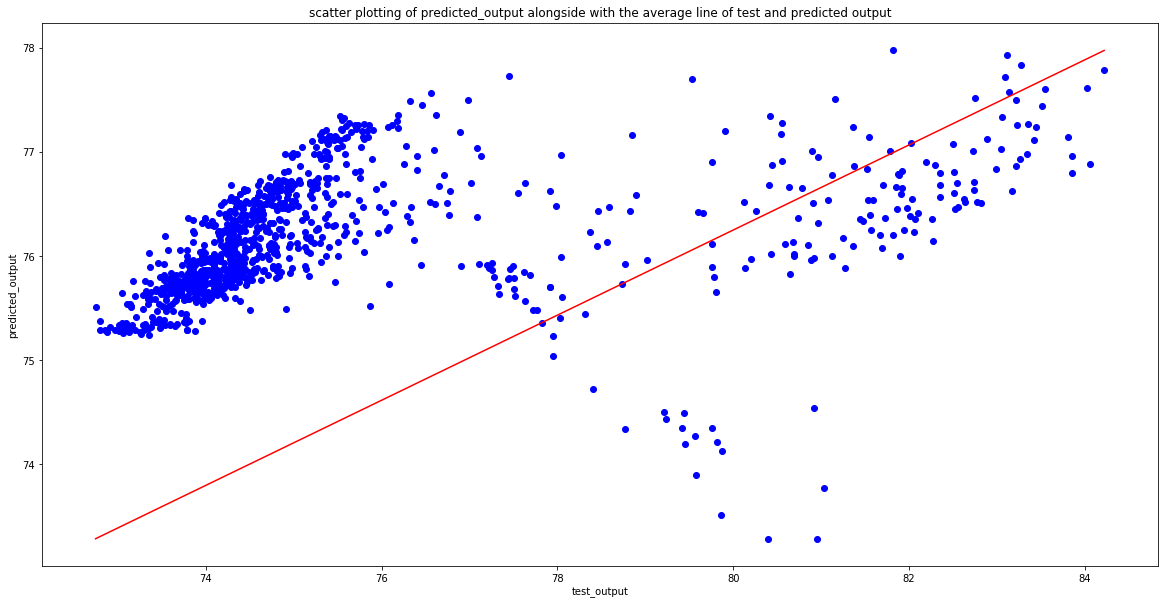

<class 'numpy.ndarray'>


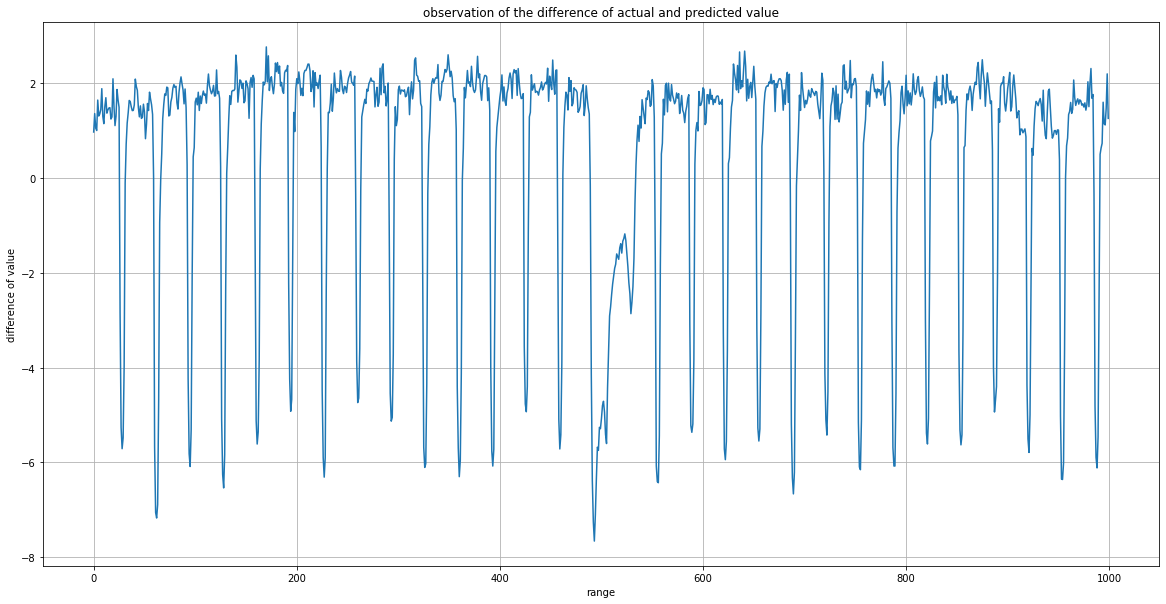

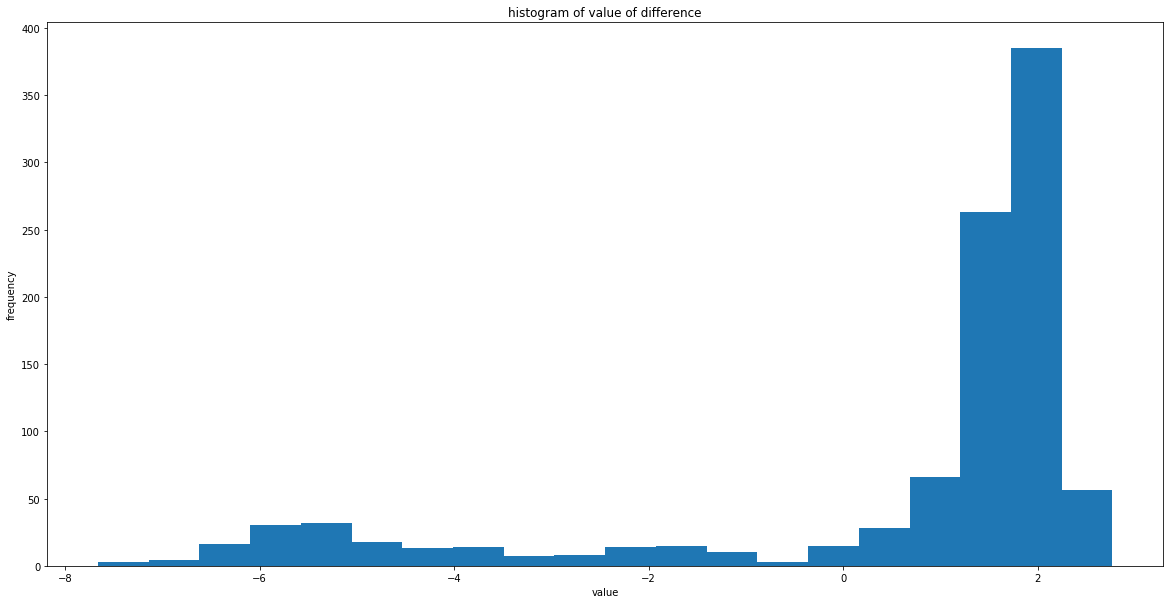

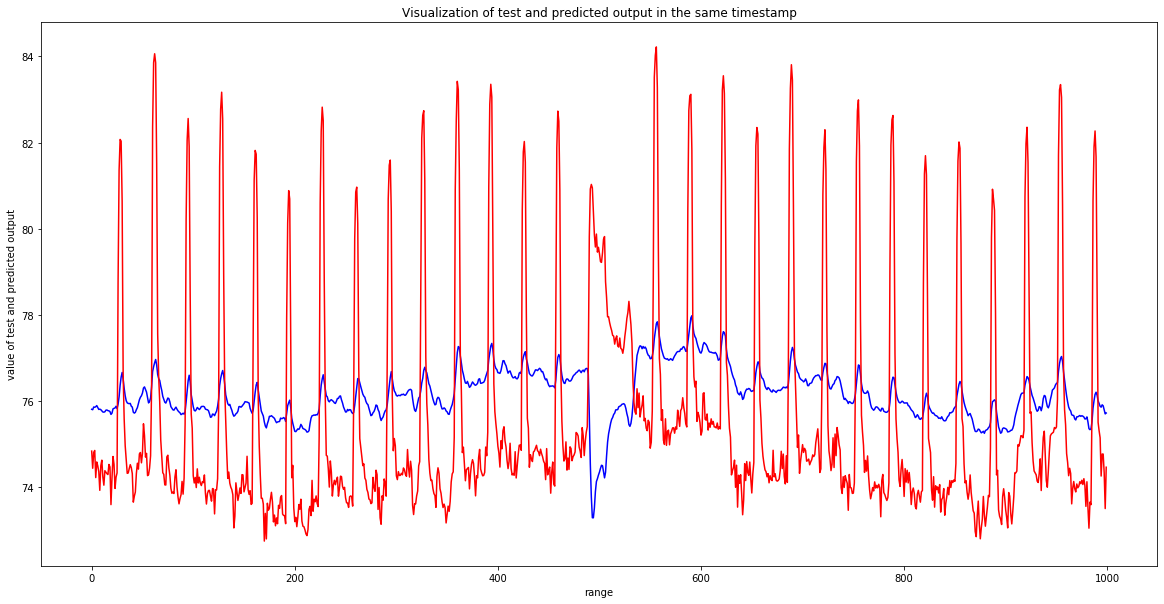

r_2 statistic: 0.07
Mean_absolute_error: 2.17
Mean squared error: 6.50
RMSE:  2.5487221035783896
!!!!---------------!!!!----------------!!!!
------- tree


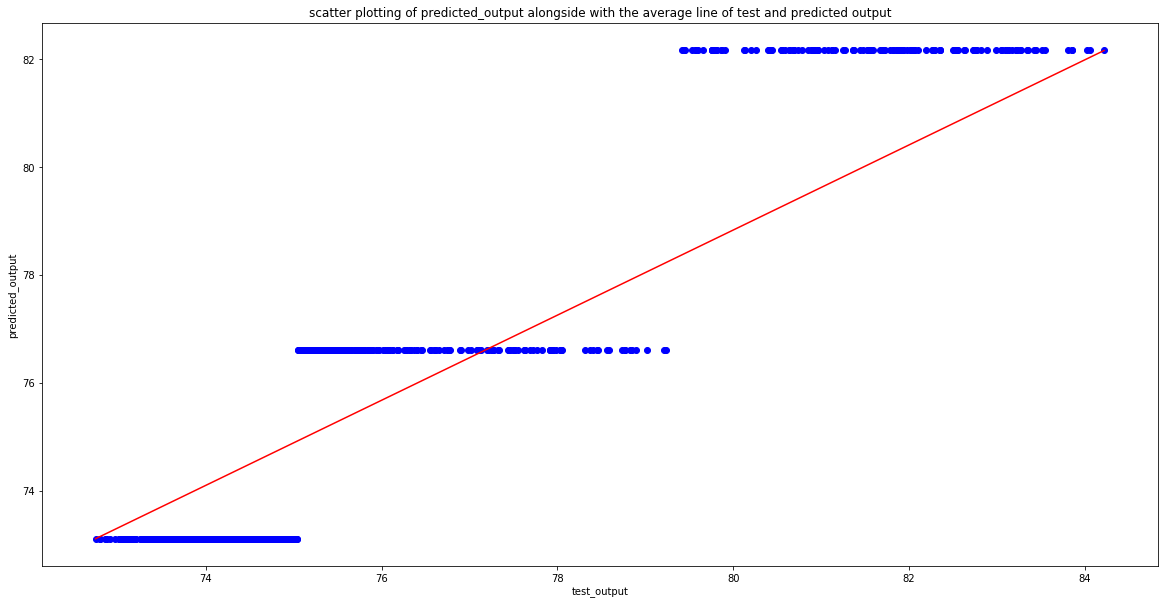

<class 'numpy.ndarray'>


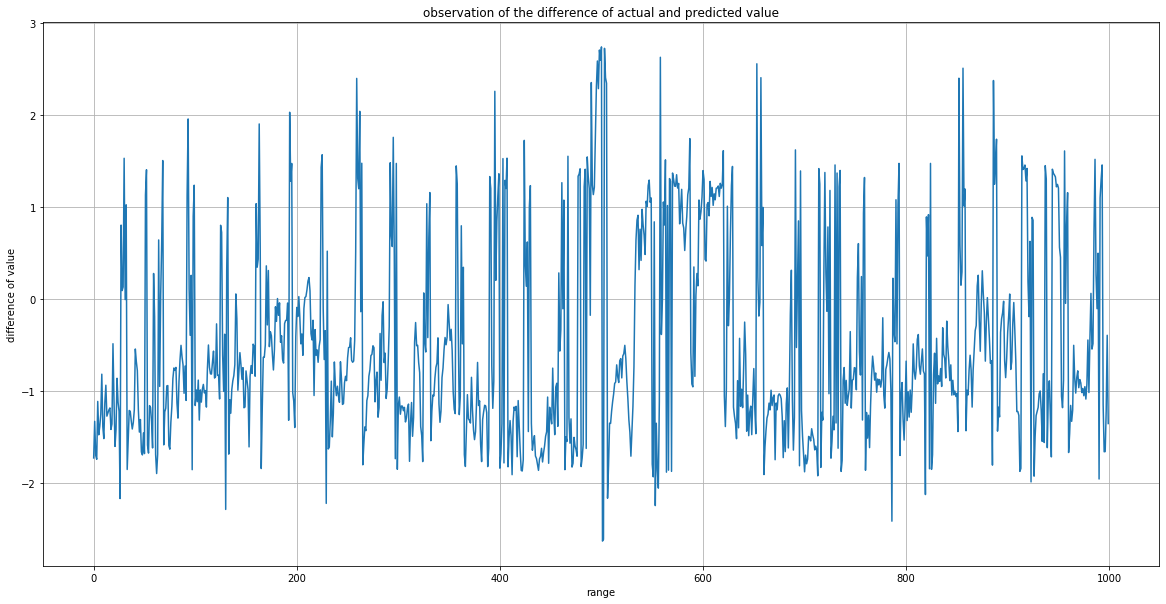

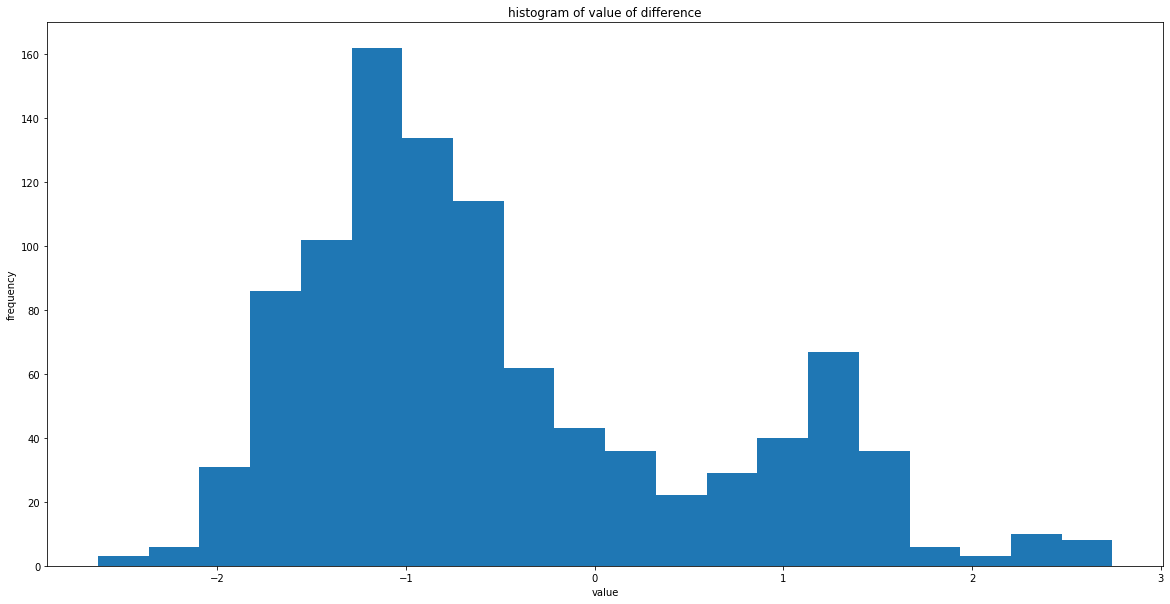

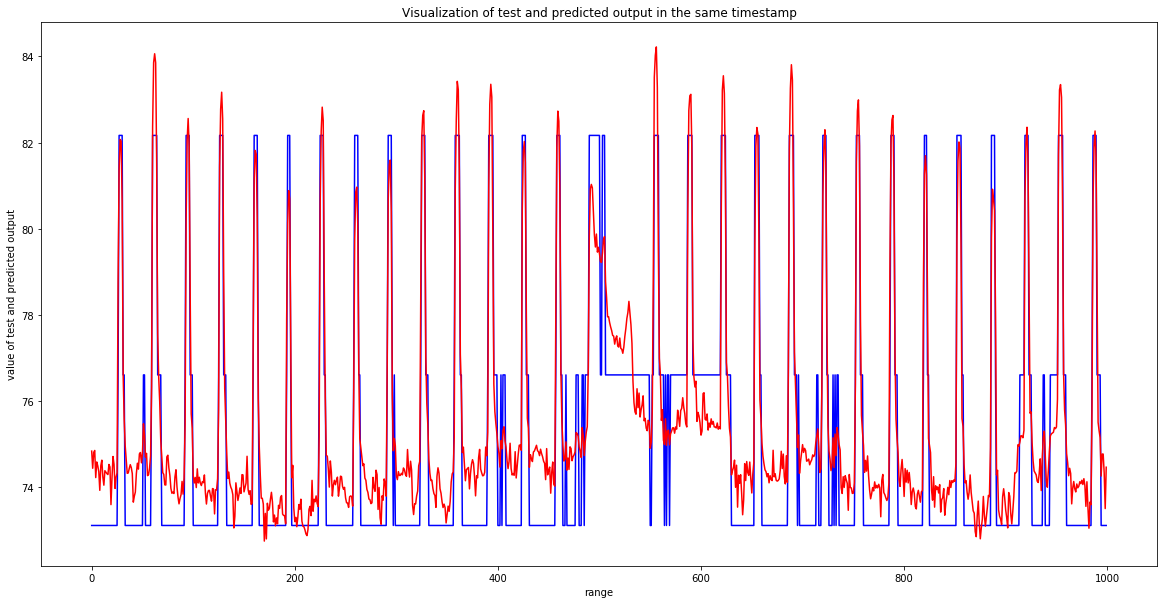

r_2 statistic: 0.80
Mean_absolute_error: 1.05
Mean squared error: 1.38
RMSE:  1.1739017321156093
!!!!---------------!!!!----------------!!!!
------- ExtraTreesRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


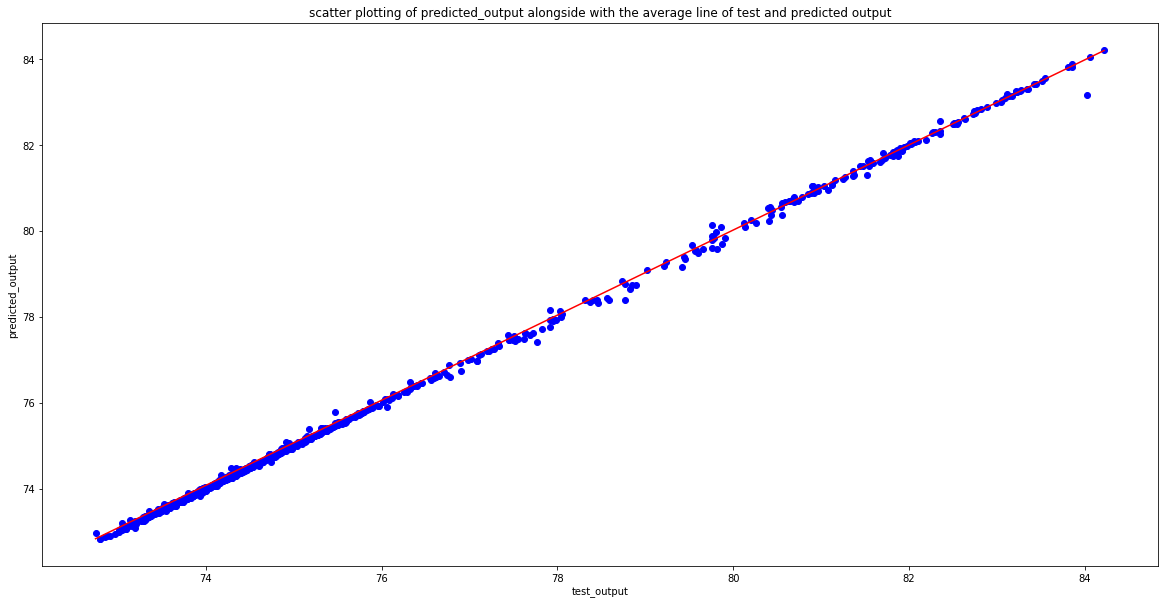

<class 'numpy.ndarray'>


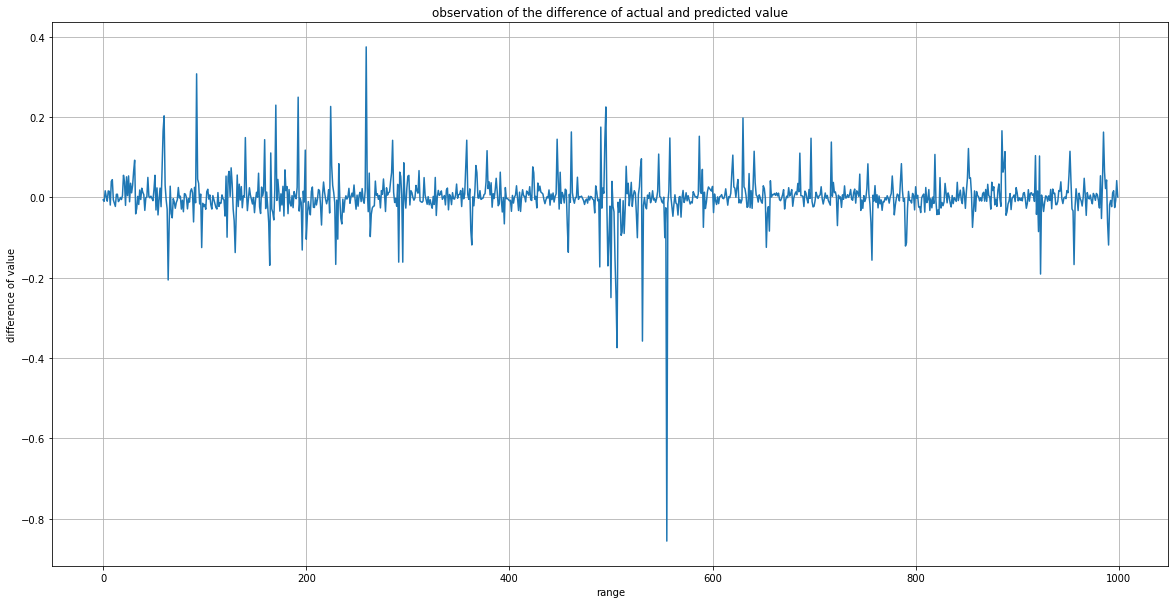

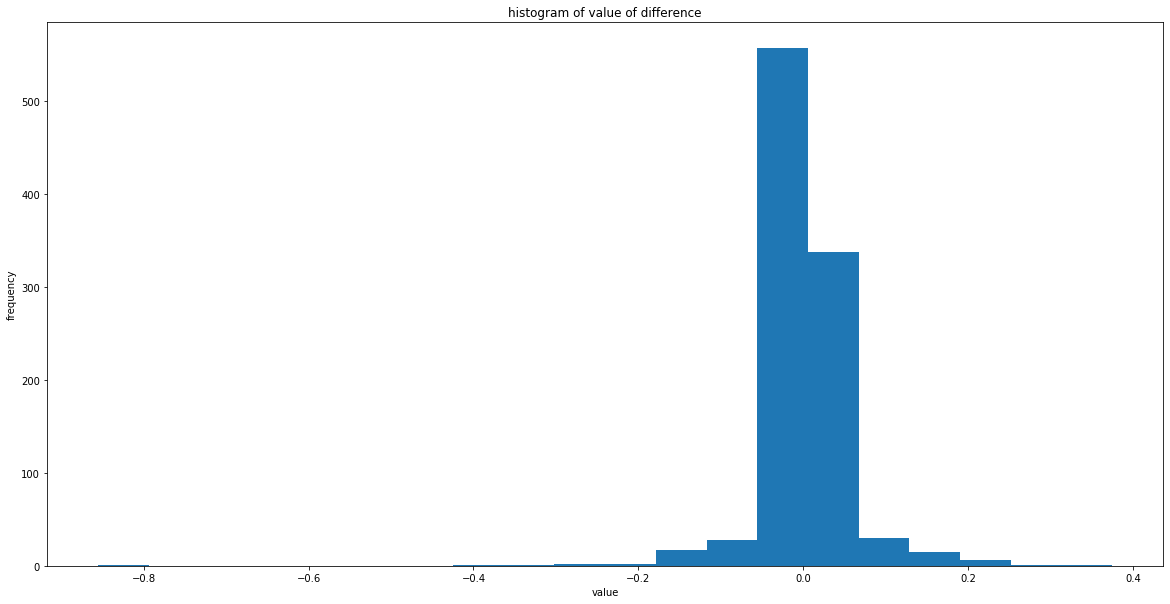

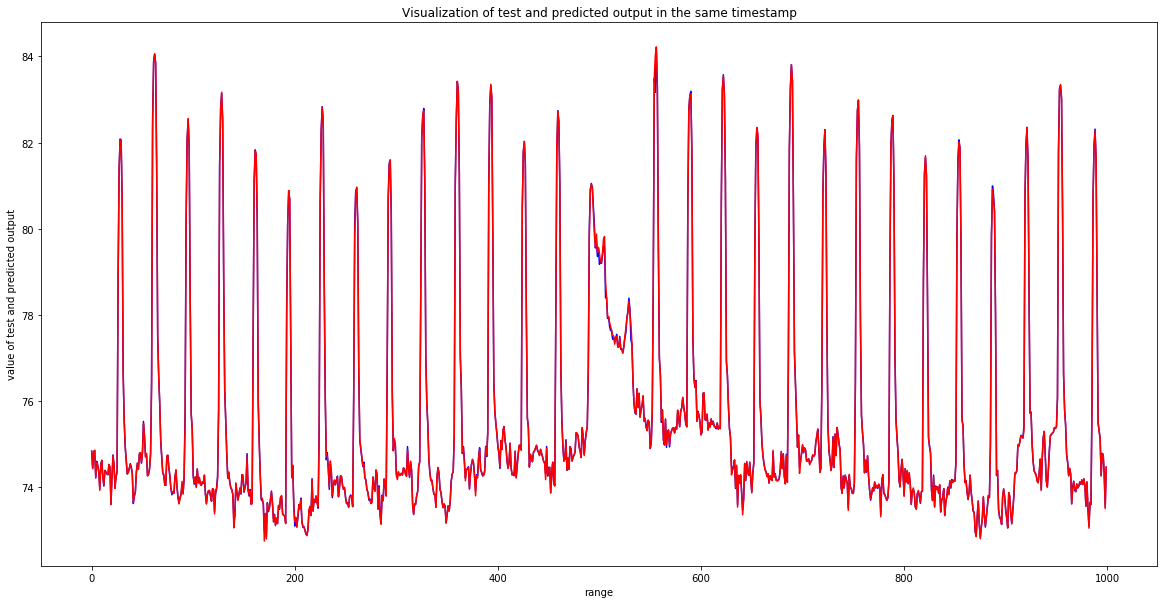

r_2 statistic: 1.00
Mean_absolute_error: 0.03
Mean squared error: 0.00
RMSE:  0.0578625580107828
!!!!---------------!!!!----------------!!!!
------- BaggingRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-pa

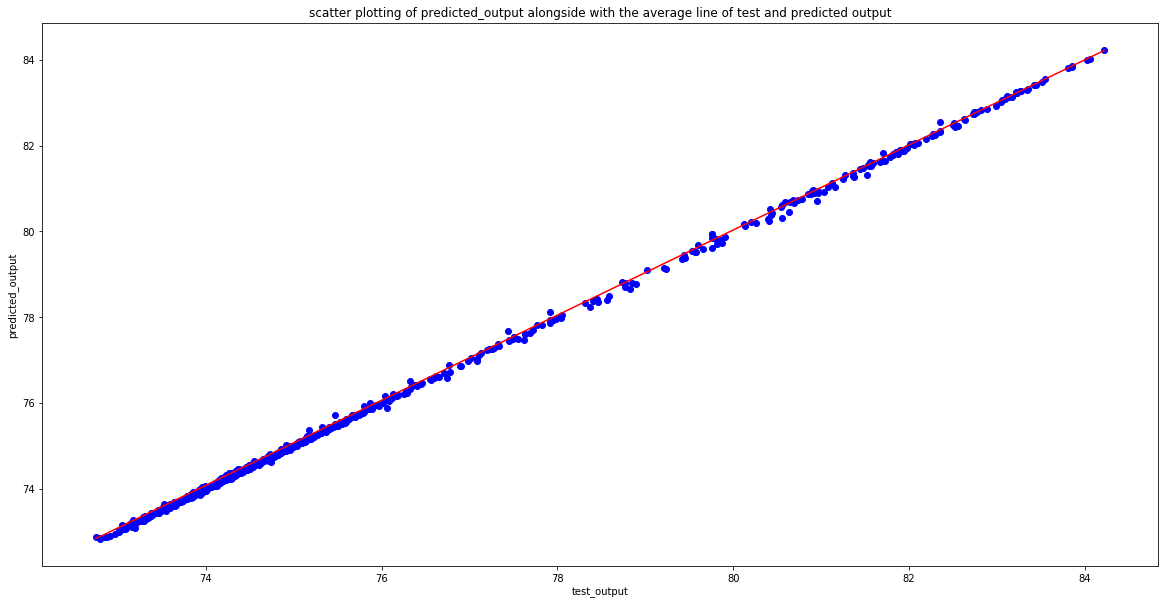

<class 'numpy.ndarray'>


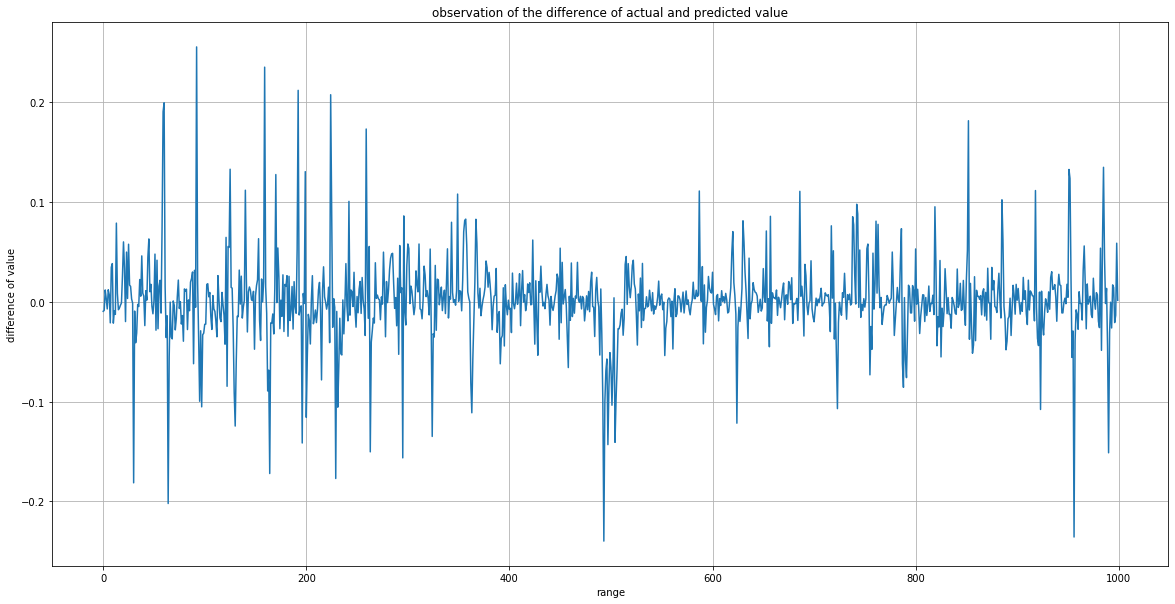

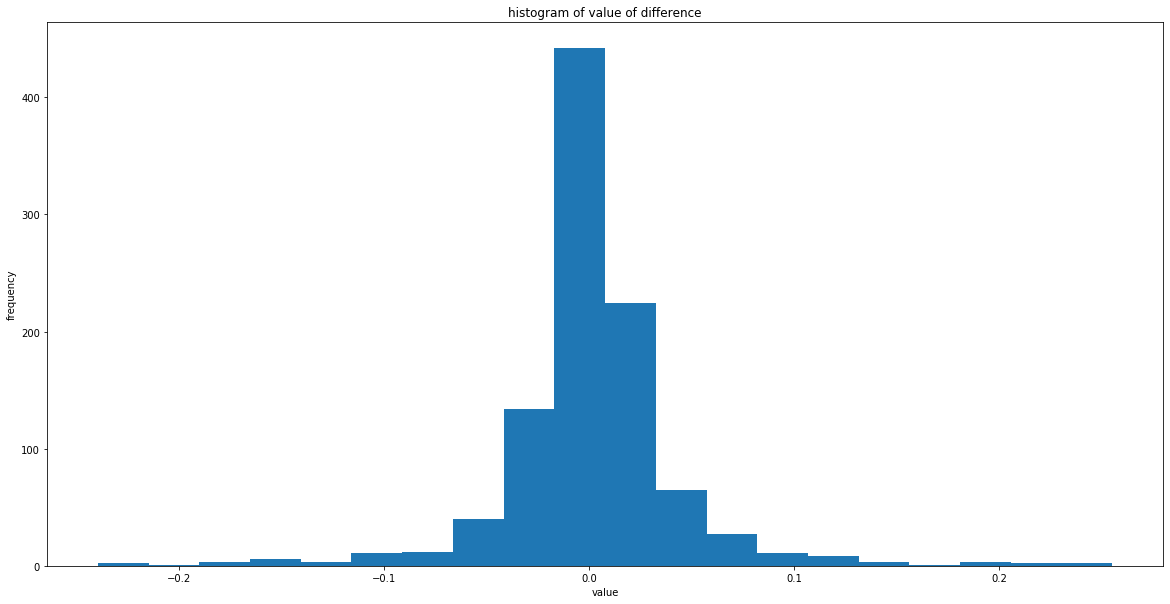

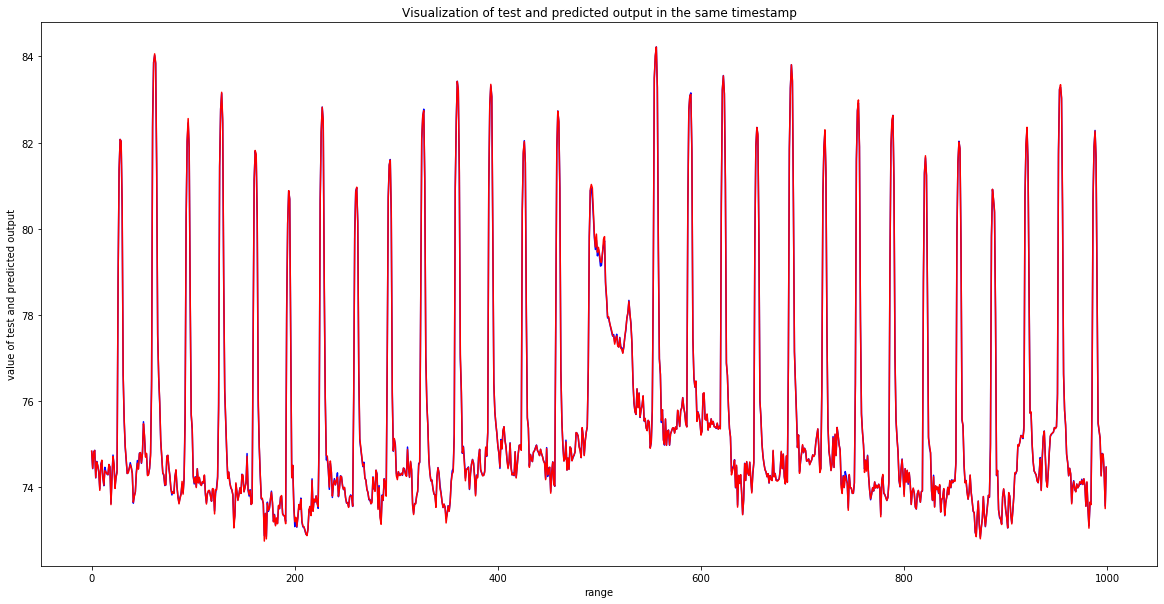

r_2 statistic: 1.00
Mean_absolute_error: 0.03
Mean squared error: 0.00
RMSE:  0.04232892413034077
!!!!---------------!!!!----------------!!!!
------- GBR


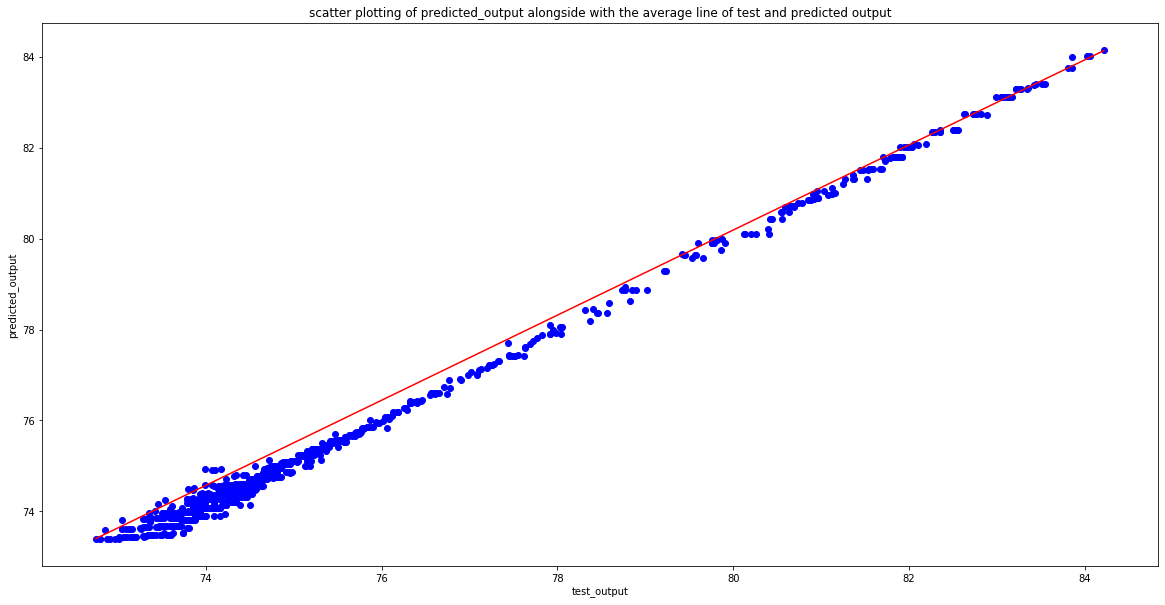

<class 'numpy.ndarray'>


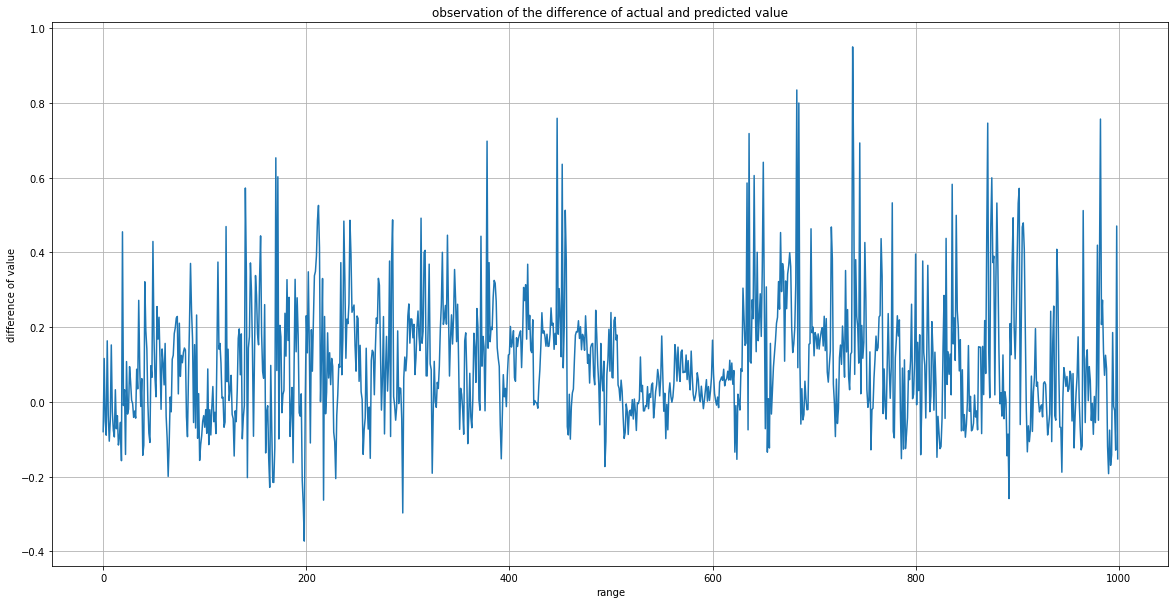

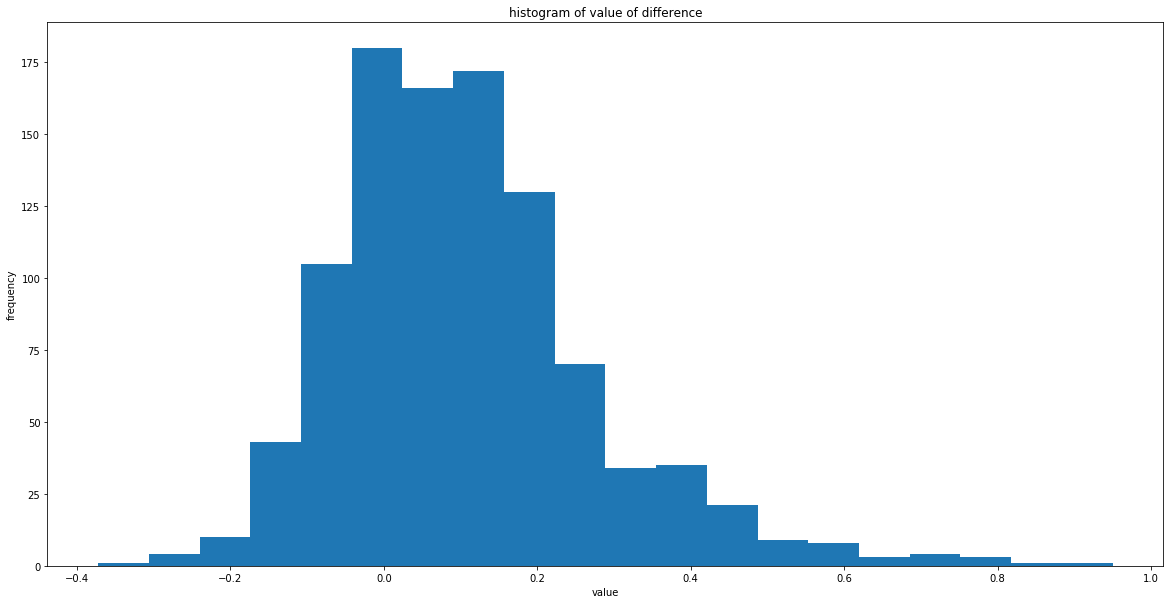

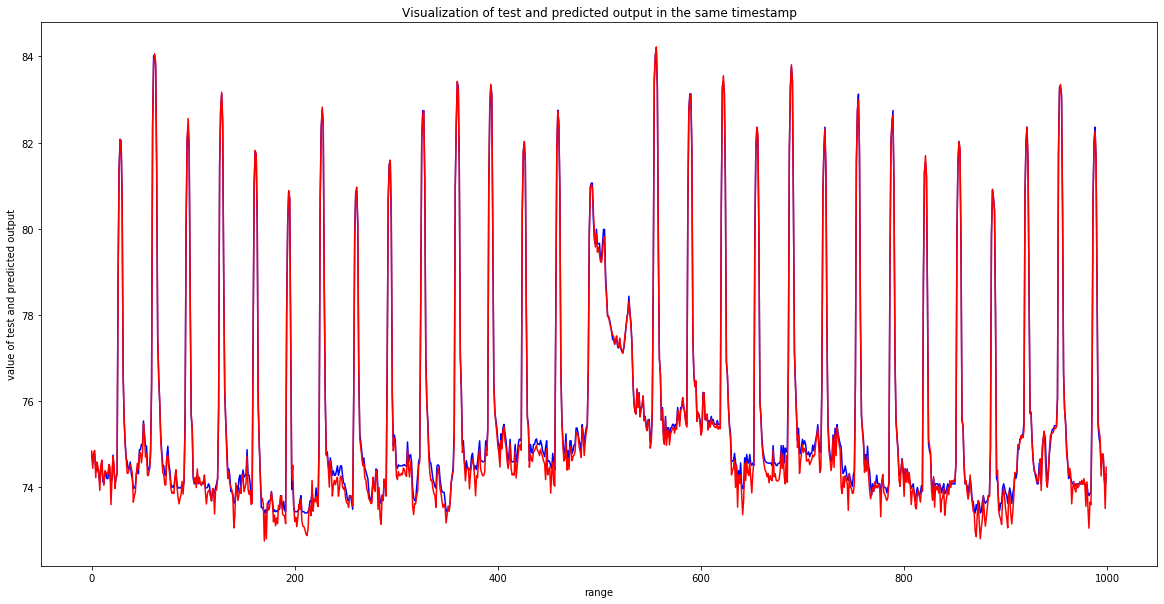

r_2 statistic: 0.99
Mean_absolute_error: 0.15
Mean squared error: 0.04
RMSE:  0.198998451929127
!!!!---------------!!!!----------------!!!!


In [50]:
model = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output, final_directory, evaluation_metrics_file_path)

In [ ]:
# rowData = dataframe_datetime.loc[ '2019-08-16 11:20:00' :, : ]
# print(type(rowData))
# print(rowData.shape)
# rowData.head(3)

dataframe_high_correlation.tail()

In [ ]:
df = dataframe_date_time_type(dataframe_high_correlation)
# df = dataframe_date_time_type(temp_frame_1)

dict_of_dates = {k: v for k, v in df.groupby('Date')}
dict_of_day_type = {k:v for k,v in df.groupby('TypeofDAY')}
dict_of_day_name = {k:v for k,v in df.groupby('day_name')}


date_key_value = collections.OrderedDict(dict_of_dates)
day_type_key_value = collections.OrderedDict(dict_of_day_type)
day_name_key_value = collections.OrderedDict(dict_of_day_name)

draw_graph_date = draw_graph(date_key_value,dict_of_dates, target_column,final_directory, subfolder_name = '3_date_fig_target')
draw_graph_week = draw_graph(day_type_key_value,dict_of_day_type, target_column,final_directory, subfolder_name = '3_week_fig_target')
draw_graph_day = draw_graph(day_name_key_value,dict_of_day_name, target_column,final_directory, subfolder_name = '3_day_fig_target')

In [ ]:
import sklearn

In [ ]:
my_model = sklearn.tree.ExtraTreeRegressor()
my_model.fit(train_input, train_output)

In [ ]:
my_pred = my_model.predict(test_input)

In [ ]:
plt.plot((min(test_output), max(test_output)), (min(my_pred), max(my_pred)), color='red')
plt.scatter(test_output, my_pred, color='blue')

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,my_pred))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,my_pred))
print("Mean squared error: %.2f" % mean_squared_error(test_output,my_pred))
RMSE=math.sqrt(mean_squared_error(test_output,my_pred))
print('RMSE: ',RMSE)

# Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [ ]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

# define model
def NN_model():
    NN_model = Sequential()
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_input.shape[1], activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#     NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(1))
    return NN_model
NN_model=NN_model()
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.summary()

In [ ]:
NN_model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size)

In [ ]:
predicted_output_NN = NN_model.predict(test_input)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output_NN))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output_NN))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output_NN))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output_NN))
print('RMSE: ',RMSE)

In [ ]:
test_output_NN = np.reshape(test_output,(-1,1))
test_output_NN.shape

In [ ]:
plot_graph(test_output_NN, predicted_output_NN, final_directory,'Neural_Network')

In [ ]:
evaluation_metrices(test_output_NN,predicted_output_NN,final_directory,'Neural Netowrk', evaluation_metrics_file_path)

# LSTM

In [ ]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [ ]:
multiple_ip_train_data, multiple_ip_test_set = make_dataset_LSTM(dataframe_high_correlation, required_number_of_test_data)

In [ ]:
X_Conv_Lstm, y_Conv_Lstm = split_sequence(multiple_ip_train_data, number_of_step_lstm)

In [ ]:
print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('y_Conv_Lstm shape: ', y_Conv_Lstm.shape,' size: ',y_Conv_Lstm.size,' dim: ',y_Conv_Lstm.ndim)

In [ ]:
samples = X_Conv_Lstm.shape[0]
time = number_of_step_lstm
rows = 1
n_features = X_Conv_Lstm.shape[-1]
cols = n_features
channels = 1

In [ ]:
# X_Conv_Lstm_train = X_Conv_Lstm.reshape((X_Conv_Lstm.shape[0], n_seq, n_rows, n_steps_2, n_features))
X_Conv_Lstm_train = X_Conv_Lstm.reshape((samples, time, rows, cols, channels)) #last 2 is feature

In [ ]:
print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('X_Conv_Lstm_train shape: ',X_Conv_Lstm_train.shape,'\tX_Conv_Lstm_train size: ',X_Conv_Lstm_train.size,'\tX_Conv_Lstm_train dimension: ',X_Conv_Lstm_train.ndim)

In [ ]:
lr = 0.01

def lr_schedule(epoch):
    print('epoch value: ', epoch)
    lr_1 = lr * (0.1 ** int(epoch / 10))
    print('now lr_1: ', lr_1)
    return lr_1

batch_size = batch_size
epochs = 4
activation_function = 'relu'

In [ ]:
model = LSTM_model(activation_function, time, rows, cols, channels)

In [ ]:
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
train_model=model.fit(X_Conv_Lstm_train, y_Conv_Lstm, batch_size=batch_size, epochs=epochs, verbose=1,
                      shuffle=True, callbacks=[LearningRateScheduler(lr_schedule)])
#                      ModelCheckpoint('E:/CONV_LSTM_30.h5', save_best_only=True)])

In [ ]:
# model.save_weights("CONV_LSTM_model.h5")
model.save("CONV_LSTM_model.h5")

In [ ]:
from keras.models import load_model
load_trained_CONV_LSTM=load_model("CONV_LSTM_model.h5")
# load_trained_model=load_model("/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/CONV_LSTM_model.h5")

In [ ]:
X_Conv_Lstm_test, y_Conv_Lstm_test = split_sequence(multiple_ip_test_set, number_of_step_lstm)
print('X_Conv_Lstm_test shape: ', X_Conv_Lstm_test.shape,'\t X_Conv_Lstm_test dimension: ', X_Conv_Lstm_test.ndim)
print('y_Conv_Lstm_test shape: ', y_Conv_Lstm_test.shape,'\t y_Conv_Lstm_test dimension: ', y_Conv_Lstm_test.ndim)

test_sample = X_Conv_Lstm_test.shape[0]
# x_input = X_Conv_Lstm_test.reshape((X_Conv_Lstm_test.shape[0], n_seq, 1, n_steps_2, X_Conv_Lstm_test.shape[2]))
x_input = X_Conv_Lstm_test.reshape((test_sample, time, rows, cols, channels))

In [ ]:
yhat = model.predict(x_input, verbose=1)

In [ ]:
yhat_loaded = load_trained_CONV_LSTM.predict(x_input, verbose=1)

In [ ]:
y_Conv_Lstm_test_reshape = np.reshape(y_Conv_Lstm_test,(-1,1))
y_Conv_Lstm_test_reshape.shape

In [ ]:
plot_graph(y_Conv_Lstm_test_reshape, yhat, final_directory,'CONV_LSTM')

In [ ]:
evaluation_metrices(y_Conv_Lstm_test_reshape, yhat_loaded, final_directory, 'CONV_LSTM',evaluation_metrics_file_path)

In [ ]:
dataframe_datetime.iloc[0:5000].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)

# VANILLA LSTM

In [ ]:
X_train_vanilla, y_train_vanilla = split_sequence(multiple_ip_train_data, number_of_step_lstm)

In [ ]:
print('X_train_vanilla shape: ',X_train_vanilla.shape,'\t dimension: ',X_train_vanilla.ndim,'\t size: ',X_train_vanilla.size)
print('y_train_vanilla shape: ',y_train_vanilla.shape,'\t dimension: ',y_train_vanilla.ndim,'\t size: ',y_train_vanilla.size)

In [ ]:
X_train_vanilla = X_train_vanilla.reshape((X_train_vanilla.shape[0], X_train_vanilla.shape[1], X_train_vanilla.shape[-1]))
print(X_train_vanilla.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.layers import Bidirectional
from keras import optimizers

In [ ]:
def vanilla_lstm(n_steps_vanilla, n_features_vanilla):
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_steps_vanilla, n_features_vanilla))) # this and following both lines are right
#     model.add(LSTM(50,return_sequences=True, activation='relu',input_dim=n_features, input_length=n_steps_vanilla))
#     model.add(LSTM(50,return_sequences=True))
#     model.add(LSTM(50))
    model.add(Dense(1))
    return model

In [ ]:
n_steps_vanilla = number_of_step_lstm
n_features_vanilla = X_train_vanilla.shape[-1]
vanilla_model = vanilla_lstm(n_steps_vanilla, n_features_vanilla)

In [ ]:
vanilla_model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [ ]:
vanilla_model.summary()

In [ ]:
train_model_vanilla = vanilla_model.fit(X_train_vanilla, y_train_vanilla, batch_size=batch_size, epochs=epochs, verbose=1,
                            callbacks=[LearningRateScheduler(lr_schedule)])

In [ ]:
vanilla_model.save("VANILLA_LSTM.h5")

In [ ]:
load_trained_VANILLA_LSTM=load_model("VANILLA_LSTM.h5")

In [ ]:
test_ip_vanilla,test_op_vanilla=split_sequence(multiple_ip_test_set,number_of_step_lstm)
n_features_test = test_ip_vanilla.shape[-1]
X_test_ip_vanilla=test_ip_vanilla.reshape((test_ip_vanilla.shape[0], test_ip_vanilla.shape[1], n_features_test))

In [ ]:
yhat_vanilla_loaded = vanilla_model.predict(X_test_ip_vanilla, verbose=1)
print(yhat_vanilla_loaded.shape)

In [ ]:
evaluation_metrices(test_op_vanilla, yhat_vanilla_loaded, final_directory, 'VANILLA_LSTM',evaluation_metrics_file_path)

In [ ]:
import numpy as np
A = [12,3,4,5,6,7,8,9,12,10,201,202,21,-2,-3]

In [ ]:
A = np.array(A)
print(type(A))
print(A.shape)

In [ ]:
print(A[0:])

In [ ]:
print(A[-1:])

In [ ]:
print(A[-5:])

# ARIMA TESTING

In [88]:
df = dataframe_no_string[[target_column]]

In [89]:
type(df)

pandas.core.frame.DataFrame

In [90]:
df.head()

,AEWIHO_T9AV2
0,66.387058
1,66.765225
2,66.767387
3,66.859457
4,66.869962


In [92]:
df_1 = dataframe_no_string.iloc[:,-1]
type(df_1)

pandas.core.series.Series

In [110]:
# from statsmodels.tsa.stattools import adfuller
# from numpy import log
# result = adfuller(df_1.values.dropna())
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])

In [107]:
print(df.shape)
print(df_1.shape)

(43982, 1)
(43982,)


In [112]:
# ADF Test
result = adfuller(df_1.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -6.584292658591291
p-value: 7.3808630862671725e-09
Critial Values:
   1%, -3.4304988558059533
Critial Values:
   5%, -2.8616057910089174
Critial Values:
   10%, -2.5668050184129987


In [113]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    p_value = dfoutput['p-value']
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 
    
    if p_value <= 0.05:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 
    

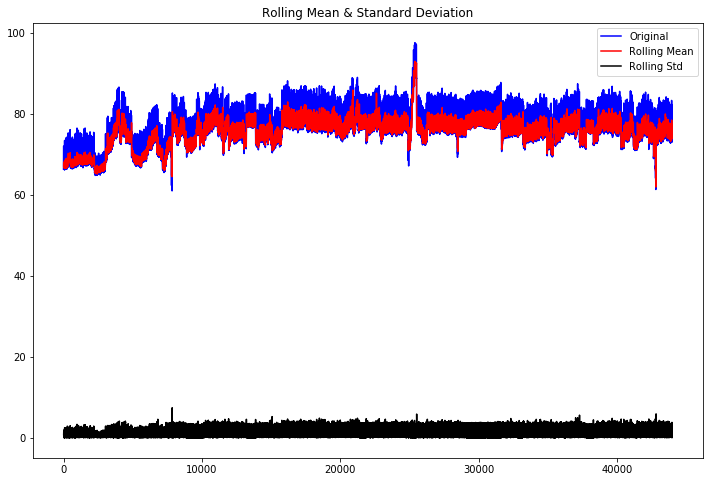

Results of Dickey-Fuller Test:
Test Statistic                -6.584293e+00
p-value                        7.380863e-09
#Lags Used                     4.800000e+01
Number of Observations Used    4.393300e+04
Critical Value (1%)           -3.430499e+00
Critical Value (5%)           -2.861606e+00
Critical Value (10%)          -2.566805e+00
dtype: float64
 => P-Value = 7.3808630862671725e-09. Rejecting Null Hypothesis.
 => Series is Stationary.


In [114]:
test_stationarity(df_1)

In [137]:
def make_dataset(PandaDataframe):
    dataset = np.array(PandaDataframe)

    NumberOfElements = int(len(dataset)*0.9985)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    train_data = dataset[0:NumberOfElements]
    test_data = dataset[NumberOfElements:len(dataset)]
    
    return train_data, test_data

train_set, test_set = make_dataset(df)
print('train_set shape: ', train_set.shape)
print('test_set shape: ', test_set.shape)

dataset length:  43982
Number of Elements for training:  43916
train_set shape:  (43916, 1)
test_set shape:  (66, 1)


In [143]:
Actual = [x for x in train_set]
Predictions = list()

In [144]:
#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
#     print('from function screaming')
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [145]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [146]:
count_1=1
for timepoint in range(len(test_set)):
#     print('I am in for loop')
    ActualValue =  test_set[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 1,1,2)
    print('count=%d, Actual=%f, Predicted=%f' % (count_1 ,ActualValue, Prediction))
    count_1+=1
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

count=1, Actual=74.653270, Predicted=74.506462
count=2, Actual=73.917947, Predicted=74.831787
count=3, Actual=74.665629, Predicted=73.653770
count=4, Actual=75.150077, Predicted=75.300877
count=5, Actual=75.295906, Predicted=75.079294
count=6, Actual=74.721550, Predicted=75.396609
count=7, Actual=74.145341, Predicted=74.443826
count=8, Actual=73.994877, Predicted=74.166738
count=9, Actual=74.374280, Predicted=74.107590
count=10, Actual=74.821962, Predicted=74.654156
count=11, Actual=75.189006, Predicted=74.970637
count=12, Actual=75.232878, Predicted=75.301192
count=13, Actual=75.251107, Predicted=75.184282
count=14, Actual=75.272425, Predicted=75.271862
count=15, Actual=75.380870, Predicted=75.254300
count=16, Actual=75.354299, Predicted=75.411841
count=17, Actual=75.394155, Predicted=75.291813
count=18, Actual=76.038954, Predicted=75.410795
count=19, Actual=81.708670, Predicted=76.226969
count=20, Actual=83.221336, Predicted=83.524378
count=21, Actual=83.345228, Predicted=81.697128
c

In [147]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_set, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)

print("size of prediction: ",len(Predictions))
print("size of actual: ",len(Actual))

Test Mean Squared Error (smaller the better fit): 1.186
size of prediction:  66
size of actual:  43982


In [156]:
print(type(Predictions))
predictions_array = np.array(Predictions)
print(type(predictions_array))
print(predictions_array.shape)
print(type(test_set))
print(test_set.shape)

<class 'list'>
<class 'numpy.ndarray'>
(66, 1)
<class 'numpy.ndarray'>
(66, 1)


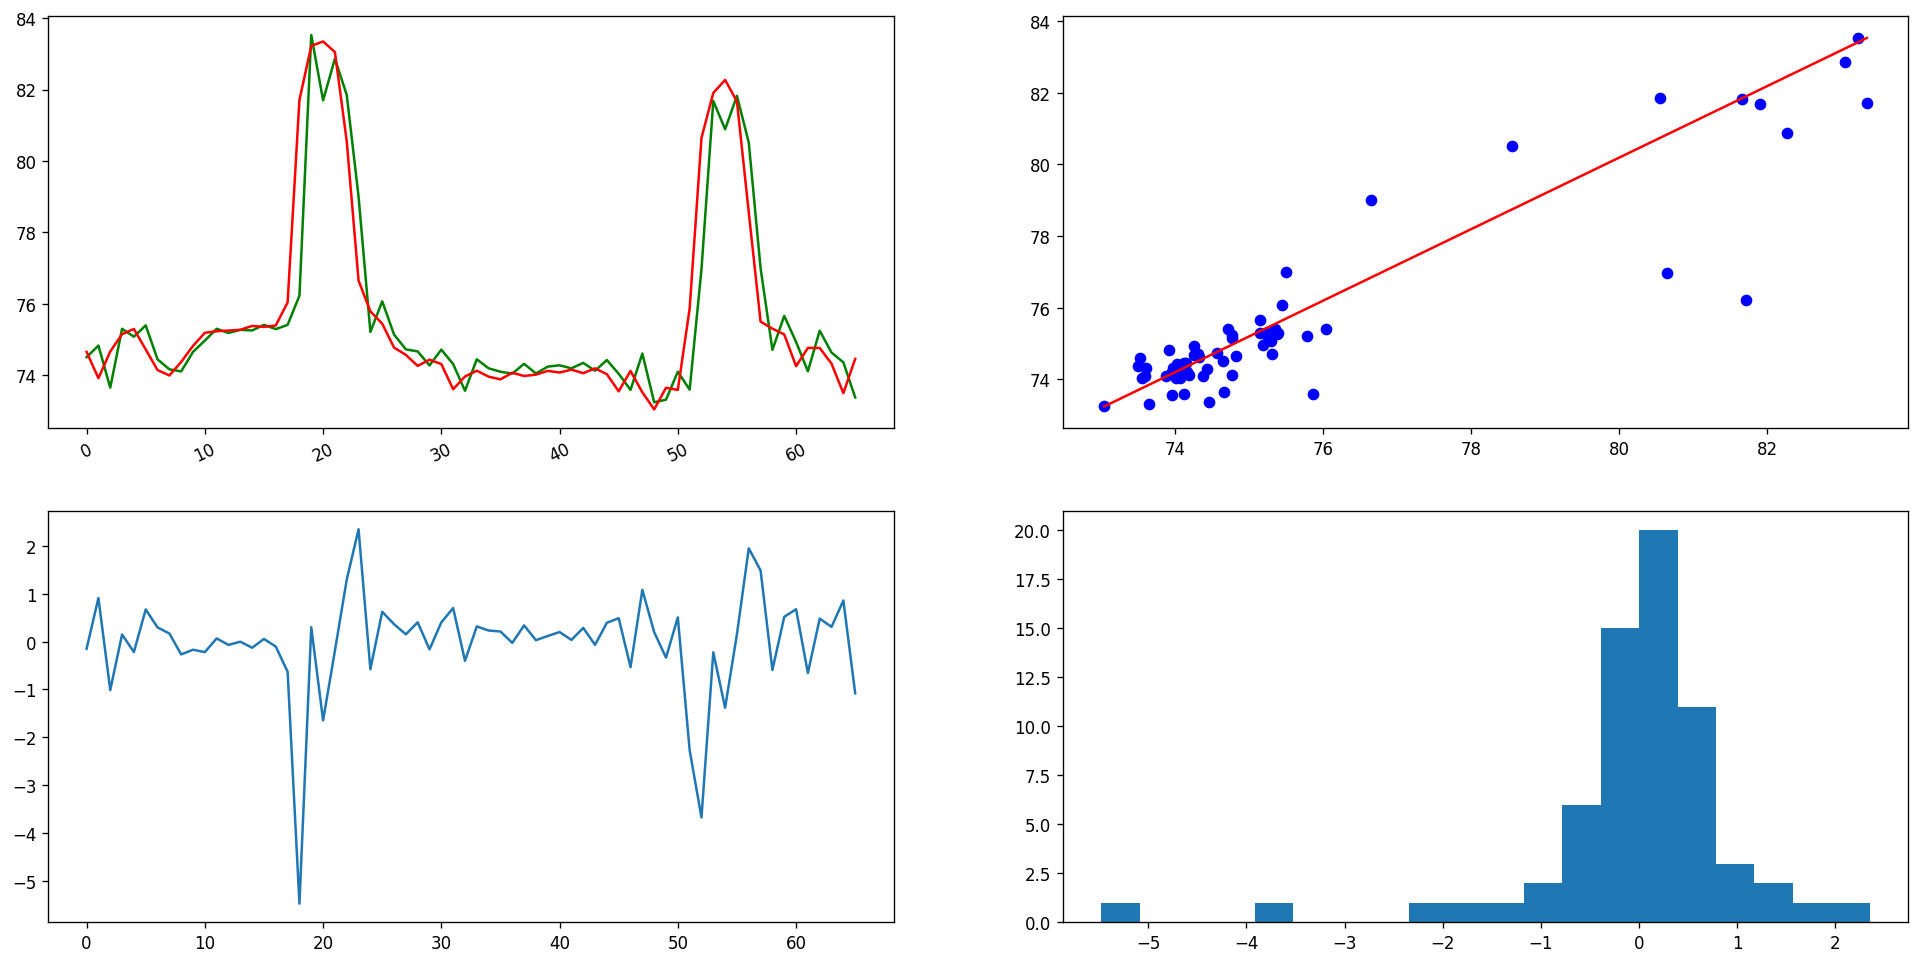

In [166]:
plt.subplot(2,2,1)
plt.plot(Predictions,color='green')
plt.plot(test_set,color='red')
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)

plt.subplot(2,2,2)
plt.plot((min(test_set), max(test_set)), (min(predictions_array), max(predictions_array)), color='red')
plt.scatter(test_set, predictions_array, color='blue')


plt.subplot(2,2,3)
difference_of_value = predictions_array - test_set
# print(type(difference_of_value))
plt.plot(difference_of_value[:])

plt.subplot(2,2,4)
plt.hist(difference_of_value, bins=20)

plt.show()

In [168]:
%matplotlib inline
import re
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

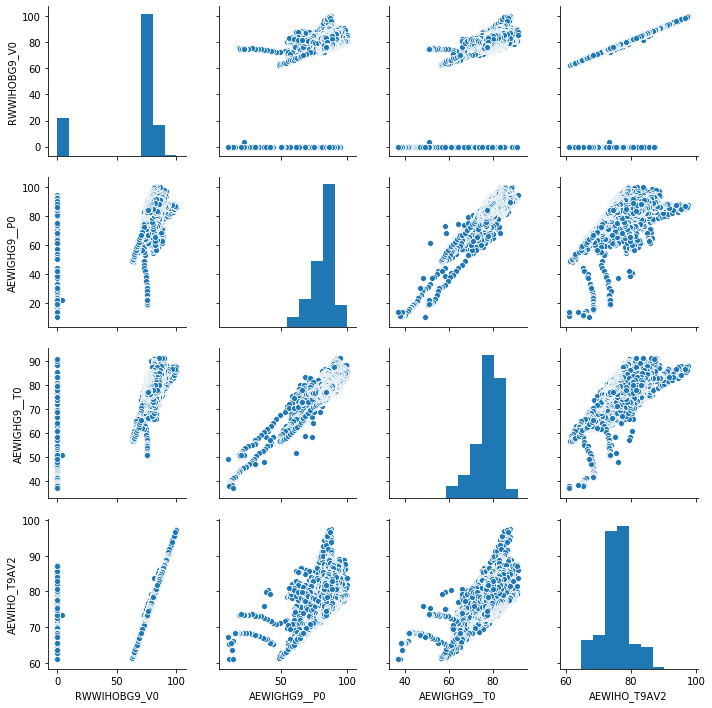

In [169]:
sns.pairplot(dataframe_high_correlation, height = 2.5)

In [170]:
stat, p = stats.normaltest(df_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=1599.592, p=0.000
Data does not look Gaussian (reject H0)


<Figure size 432x288 with 0 Axes>

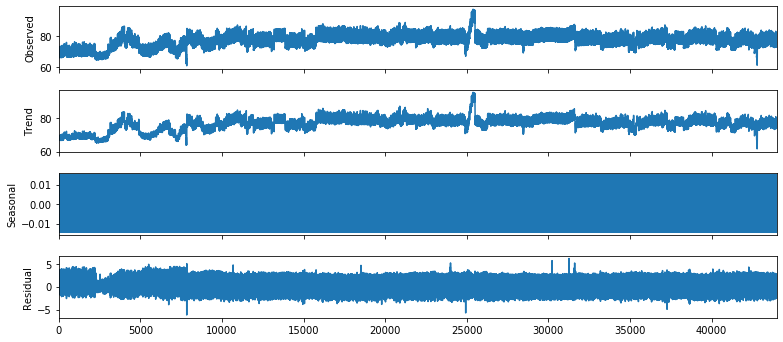

In [173]:
# decomposition = seasonal_decompose(df.iloc[:,-1], freq=7)
decomposition = seasonal_decompose(df_1, freq=7)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12,5)

In [174]:
n_sample = df_1.shape[0]
print(n_sample)

43982


In [176]:
n_train=int(0.9985*n_sample)+1
n_forecast=n_sample-n_train

ts_train = df.iloc[:n_train][target_column]
ts_test = df.iloc[n_train:][target_column]
print(ts_train.shape)
print(ts_test.shape)
print("Training Series:", "\n", ts_train.head(), "\n")
print("Testing Series:", "\n", ts_test.head())

(43917,)
(65,)
Training Series: 
 0    66.387058
1    66.765225
2    66.767387
3    66.859457
4    66.869962
Name: AEWIHO_T9AV2, dtype: float64 

Testing Series: 
 43917    73.917947
43918    74.665629
43919    75.150077
43920    75.295906
43921    74.721550
Name: AEWIHO_T9AV2, dtype: float64


In [177]:
def tsplot(y, lags=None, title='', figsize=(14, 8)):

    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe673a78f60>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe6739d7cf8>)

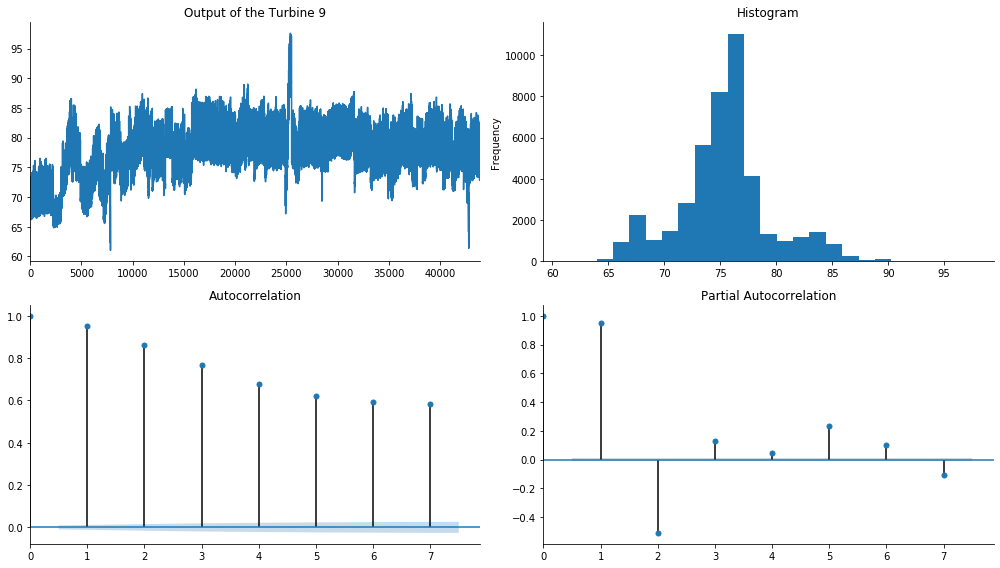

In [183]:
tsplot(ts_train, title='Output of the Turbine 9', lags=7)

In [1]:
print(dataframe_high_correlation.shape)

NameError: name 'dataframe_high_correlation' is not defined

In [186]:
dataframe_resample = dataframe_high_correlation.resample('1min').mean()

In [189]:
print(dataframe_resample.shape)

(69303, 4)
(43982, 2923)


In [ ]:
print(dataframe_resample.shape)

plt.plot(dataframe_resample[target_column], color = 'blue')
# plt.plot(dataframe_no_string[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_string[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
plt.legend([target_column], loc='best')
plt.xticks(np.arange(dataframe_resample.index[0],dataframe_resample.index[-1]),rotation='vertical')
# plt.xticks(rotation = 'vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('final_target_column.png',bbox_inches='tight')
plt.xlim(dataframe_resample.index[0],dataframe_resample.index[-1]+5)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (12, 5)

In [197]:
dataframe_resample.index[-1]

Timestamp('2019-03-31 23:59:00', freq='T')